<a href="https://colab.research.google.com/github/RMCV-Rajapaksha/TeamInception_Datathon/blob/main/task2_eda_and_data_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 1 Notebook for "insert model name here"


## Imports and Setup

**Import the Libararies**


In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

### Connecting to Google Drive

In [2]:
# drive.mount('/content/drive')

### Reading data set files

In [3]:
# Developers please update the paths according to were in your google you place datasets
# i recommend making Rootcode-ML folder and in it Datasets folder and placing the csv files there then you wont have to change below code block
bookings_data = pd.read_csv('../dataset/bookings_train.csv')
tasks_data = pd.read_csv('../dataset/tasks.csv')
staffing_data = pd.read_csv('../dataset/staffing_train.csv')

In [4]:
bookings_data.head()

,booking_id,citizen_id,booking_date,appointment_date,appointment_time,check_in_time,check_out_time,task_id,num_documents,queue_number,satisfaction_rating
0,f7b59ba3793fea61282cb02be2247cebd0a75306,4229044420,2021-01-01,2021-01-01,09:03,2021-01-01 09:11:00,2021-01-01 09:48:15.166353269,TASK-002,0,2,4
1,cfe30d53b4b645e4cb6b114f6c9d74a0f25e6a80,5389442635,2021-01-01,2021-01-01,09:12,2021-01-01 09:24:00,2021-01-01 10:24:12.189261137,TASK-001,1,1,4
2,0fb0a5d9b3944dd743a9e7828dc03fa74aa6ebf8,2123783919,2021-01-01,2021-01-01,09:36,2021-01-01 09:29:00,2021-01-01 10:26:48.802260864,TASK-002,1,6,5
3,d4bf826153212fa325ad98b215668ab942365607,6359918966,2021-01-01,2021-01-01,09:45,2021-01-01 10:07:00,2021-01-01 11:00:13.485642822,TASK-001,1,4,4
4,ebb4c9687acbaf65376d8e379bd1341d1c15127e,178732202,2021-01-01,2021-01-01,10:12,2021-01-01 10:26:00,2021-01-01 11:54:53.260180213,TASK-002,1,8,3


## EDA


### EDA of Bookings data

lets take a look at the columns and some of their values

In [5]:
staffing_data.head()

,date,section_id,employees_on_duty,total_task_time_minutes
0,2021-01-01,SEC-001,1,834.569483
1,2021-01-01,SEC-002,4,1525.368990
2,2021-01-01,SEC-003,2,662.095279
3,2021-01-01,SEC-004,4,1499.112620
4,2021-01-01,SEC-005,3,1238.533073


In [6]:
staffing_data.describe()

,employees_on_duty,total_task_time_minutes
count,5802.000000,5802.000000
mean,4.458807,1662.296769
std,2.794417,1147.134643
min,1.000000,91.109596
25%,3.000000,859.104314
50%,4.000000,1358.176924
75%,6.000000,2123.936358
max,26.000000,10658.173092


removing unnecessary columns. We wont need the total_task_time_minutes because this data wont be provided as input from the test datasets. We need the date and section_id  because they will be to calculate the actual target value (the thing to be predicted) for task 2.

In [7]:
staffing_data = staffing_data.drop(['total_task_time_minutes'],axis=1)

now lets look at the new table headers again.


In [8]:
staffing_data.head()

,date,section_id,employees_on_duty
0,2021-01-01,SEC-001,1
1,2021-01-01,SEC-002,4
2,2021-01-01,SEC-003,2
3,2021-01-01,SEC-004,4
4,2021-01-01,SEC-005,3


lets get a better idea of how null values have been distributed amoung the columns

In [9]:
staffing_data.isna().sum()

date                 0
section_id           0
employees_on_duty    0
dtype: int64

## Data Preprocessing


### Rearrangement and processing of columns

### Dataset seperation according to section_id

In [10]:
task_counts = staffing_data.groupby("section_id").size().reset_index(name="count")
task_counts

,section_id,count
0,SEC-001,967
1,SEC-002,967
2,SEC-003,967
3,SEC-004,967
4,SEC-005,967
5,SEC-006,967


In [11]:
sec_1_data = staffing_data[staffing_data['section_id'] == 'SEC-001'].copy()
sec_2_data = staffing_data[staffing_data['section_id'] == 'SEC-002'].copy()
sec_3_data = staffing_data[staffing_data['section_id'] == 'SEC-003'].copy()
sec_4_data = staffing_data[staffing_data['section_id'] == 'SEC-004'].copy()
sec_5_data = staffing_data[staffing_data['section_id'] == 'SEC-005'].copy()
sec_6_data = staffing_data[staffing_data['section_id'] == 'SEC-006'].copy()


In [12]:
sec_6_data.head()

,date,section_id,employees_on_duty
5,2021-01-01,SEC-006,11
11,2021-01-04,SEC-006,6
17,2021-01-05,SEC-006,5
23,2021-01-06,SEC-006,10
29,2021-01-07,SEC-006,5


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.stats.diagnostic import acorr_ljungbox
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scipy.stats import jarque_bera
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

class AdvancedARIMAPredictor:
    """
    Advanced ARIMA with multiple enhancement techniques for better predictions
    """
    
    def __init__(self, data, target_column, section_name):
        self.data = data.copy()
        self.target_column = target_column
        self.section_name = section_name
        self.original_series = data[target_column].copy()
        
        # Enhancement options
        self.use_log_transform = False
        self.use_box_cox = False
        self.use_seasonal_decomposition = False
        self.use_outlier_treatment = True
        self.use_ensemble = False
        
        # Results storage
        self.models = {}
        self.transformations = {}
        self.results = {}
        
    def enhanced_preprocessing(self, method='auto'):
        """
        Advanced preprocessing with multiple options
        Methods: 'auto', 'log', 'box_cox', 'seasonal_decomp', 'outlier_only'
        """
        print(f"\n{'='*50}")
        print(f"ENHANCED PREPROCESSING FOR {self.section_name}")
        print(f"{'='*50}")
        
        series = self.original_series.copy()
        transformations_applied = []
        
        # 1. Handle missing values with advanced interpolation
        if series.isnull().any():
            print(f"Missing values found: {series.isnull().sum()}")
            # Use time-aware interpolation
            series = series.interpolate(method='time', limit_direction='both')
            transformations_applied.append('time_interpolation')
        
        # 2. Advanced outlier detection and treatment
        if self.use_outlier_treatment or method == 'auto':
            print("Applying advanced outlier treatment...")
            series = self._advanced_outlier_treatment(series)
            transformations_applied.append('outlier_treatment')
        
        # 3. Variance stabilization
        if method == 'log' or (method == 'auto' and self._needs_log_transform(series)):
            print("Applying log transformation...")
            series = np.log(series + 1)  # +1 to handle zeros
            self.use_log_transform = True
            transformations_applied.append('log_transform')
            
        elif method == 'box_cox' or (method == 'auto' and self._needs_variance_stabilization(series)):
            print("Applying Box-Cox transformation...")
            from scipy.stats import boxcox
            series_positive = series - series.min() + 1
            series, lambda_param = boxcox(series_positive)
            self.use_box_cox = True
            self.transformations['box_cox_lambda'] = lambda_param
            transformations_applied.append('box_cox_transform')
        
        # 4. Seasonal decomposition for trend removal
        if method == 'seasonal_decomp' or (method == 'auto' and self._has_strong_trend(series)):
            print("Applying seasonal decomposition...")
            series = self._apply_seasonal_decomposition(series)
            transformations_applied.append('seasonal_decomposition')
        
        self.processed_series = series
        self.transformations['applied'] = transformations_applied
        
        print(f"Applied transformations: {', '.join(transformations_applied)}")
        return series
    
    def _advanced_outlier_treatment(self, series):
        """Advanced outlier detection using multiple methods"""
        # Method 1: IQR with seasonal adjustment
        if len(series) > 14:  # Enough data for seasonal analysis
            seasonal_period = min(7, len(series) // 3)
            seasonal_medians = []
            
            for i in range(seasonal_period):
                seasonal_data = series.iloc[i::seasonal_period]
                seasonal_medians.append(seasonal_data.median())
            
            # Create seasonal baseline
            seasonal_baseline = []
            for i, value in enumerate(series):
                seasonal_idx = i % seasonal_period
                seasonal_baseline.append(seasonal_medians[seasonal_idx])
            
            # Detect outliers relative to seasonal pattern
            residuals = series - seasonal_baseline
            Q1, Q3 = residuals.quantile([0.15, 0.85])  # More conservative
            IQR = Q3 - Q1
            
            outlier_mask = (residuals < (Q1 - 2.0 * IQR)) | (residuals > (Q3 + 2.0 * IQR))
        else:
            # Simple IQR for short series
            Q1, Q3 = series.quantile([0.1, 0.9])
            IQR = Q3 - Q1
            outlier_mask = (series < (Q1 - 2.0 * IQR)) | (series > (Q3 + 2.0 * IQR))
        
        # Treatment: Cap outliers instead of removing
        series_treated = series.copy()
        if outlier_mask.any():
            print(f"  Outliers detected: {outlier_mask.sum()}")
            lower_cap = series.quantile(0.05)
            upper_cap = series.quantile(0.95)
            series_treated = np.clip(series_treated, lower_cap, upper_cap)
        
        return series_treated
    
    def _needs_log_transform(self, series):
        """Check if log transformation is beneficial"""
        # Check for right skewness
        skewness = stats.skew(series.dropna())
        return skewness > 1.5
    
    def _needs_variance_stabilization(self, series):
        """Check if variance stabilization is needed"""
        # Check if variance increases with level
        if len(series) < 20:
            return False
        
        # Split into quarters and compare variances
        q1_var = series[:len(series)//4].var()
        q4_var = series[3*len(series)//4:].var()
        
        return q4_var > 2 * q1_var
    
    def _has_strong_trend(self, series):
        """Check for strong trend that might need decomposition"""
        if len(series) < 20:
            return False
        
        # Simple trend test using correlation with time
        time_index = np.arange(len(series))
        correlation = np.corrcoef(series.dropna(), time_index[:len(series.dropna())])[0, 1]
        
        return abs(correlation) > 0.7
    
    def _apply_seasonal_decomposition(self, series):
        """Apply seasonal decomposition and return detrended series"""
        try:
            period = min(7, len(series) // 3)
            decomposition = seasonal_decompose(series, model='additive', period=period, extrapolate_trend='freq')
            
            # Return residuals + seasonal (remove trend)
            detrended = decomposition.observed - decomposition.trend
            self.transformations['seasonal_decomp'] = decomposition
            return detrended.fillna(method='ffill').fillna(method='bfill')
        except:
            print("  Seasonal decomposition failed, skipping...")
            return series
    
    def enhanced_stationarity_testing(self, series, max_diff=3):
        """Enhanced stationarity testing with automatic differencing"""
        print(f"\n{'='*40}")
        print("ENHANCED STATIONARITY TESTING")
        print(f"{'='*40}")
        
        current_series = series.copy()
        differencing_order = 0
        
        for d in range(max_diff + 1):
            if d > 0:
                current_series = current_series.diff().dropna()
                differencing_order = d
            
            # Multiple stationarity tests
            # Ensure current_series is a pandas Series for dropna()
            if not isinstance(current_series, pd.Series):
                current_series = pd.Series(current_series)
            adf_stat, adf_p = adfuller(current_series.dropna())[:2]
            
            try:
                kpss_stat, kpss_p = kpss(current_series.dropna(), regression='ct')[:2]
            except:
                kpss_p = 0.1  # Assume stationary if test fails
            
            # Check variance stationarity
            variance_stable = self._check_variance_stationarity(current_series)
            
            print(f"Differencing order {d}:")
            print(f"  ADF p-value: {adf_p:.6f} ({'✓' if adf_p < 0.05 else '✗'})")
            print(f"  KPSS p-value: {kpss_p:.6f} ({'✓' if kpss_p > 0.05 else '✗'})")
            print(f"  Variance stable: {'✓' if variance_stable else '✗'}")
            
            if adf_p < 0.05 and kpss_p > 0.05 and variance_stable:
                print(f"✅ Series is stationary with {d} differencing steps!")
                break
        
        self.differenced_series = current_series
        self.differencing_order = differencing_order
        return current_series, differencing_order
    
    def _check_variance_stationarity(self, series):
        """Check if variance is stationary across the series"""
        if len(series) < 20:
            return True
        
        # Split series into segments and compare variances
        n_segments = min(4, len(series) // 10)
        segment_size = len(series) // n_segments
        variances = []
        
        for i in range(n_segments):
            start = i * segment_size
            end = (i + 1) * segment_size if i < n_segments - 1 else len(series)
            segment_var = series.iloc[start:end].var()
            variances.append(segment_var)
        
        # Check if variances are similar (coefficient of variation < 1)
        cv = np.std(variances) / np.mean(variances) if np.mean(variances) > 0 else 0
        return cv < 1.0
    
    def advanced_parameter_selection(self, max_p=6, max_q=6, use_information_criteria='AIC'):
        """
        Advanced parameter selection using multiple criteria
        """
        print(f"\n{'='*50}")
        print("ADVANCED PARAMETER SELECTION")
        print(f"{'='*50}")
        
        if self.differenced_series is None:
            raise ValueError("Must apply differencing first!")
        
        # Enhanced parameter search
        results = []
        best_models = {
            'AIC': {'score': float('inf'), 'params': None, 'model': None},
            'BIC': {'score': float('inf'), 'params': None, 'model': None},
            'HQIC': {'score': float('inf'), 'params': None, 'model': None}
        }
        
        print(f"Testing parameters: p(0-{max_p}), d({self.differencing_order}), q(0-{max_q})")
        
        total_models = (max_p + 1) * (max_q + 1)
        tested = 0
        
        for p in range(max_p + 1):
            for q in range(max_q + 1):
                try:
                    # Fit ARIMA model
                    model = ARIMA(self.differenced_series, order=(p, 0, q))
                    fitted_model = model.fit()
                    
                    # Calculate multiple information criteria
                    aic = fitted_model.aic
                    bic = fitted_model.bic
                    hqic = fitted_model.hqic
                    
                    # Model diagnostics
                    ljung_box_p = self._ljung_box_test(fitted_model.resid)
                    jarque_bera_p = self._jarque_bera_test(fitted_model.resid)
                    
                    results.append({
                        'p': p, 'd': self.differencing_order, 'q': q,
                        'AIC': aic, 'BIC': bic, 'HQIC': hqic,
                        'LjungBox_p': ljung_box_p,
                        'JarqueBera_p': jarque_bera_p,
                        'params': (p, self.differencing_order, q)
                    })
                    
                    # Update best models
                    if aic < best_models['AIC']['score']:
                        best_models['AIC'] = {'score': aic, 'params': (p, self.differencing_order, q), 'model': fitted_model}
                    if bic < best_models['BIC']['score']:
                        best_models['BIC'] = {'score': bic, 'params': (p, self.differencing_order, q), 'model': fitted_model}
                    if hqic < best_models['HQIC']['score']:
                        best_models['HQIC'] = {'score': hqic, 'params': (p, self.differencing_order, q), 'model': fitted_model}
                    
                    tested += 1
                    if tested % 10 == 0:
                        print(f"  Progress: {tested}/{total_models} models tested...")
                        
                except Exception as e:
                    continue
        
        # Display results
        results_df = pd.DataFrame(results)
        if not results_df.empty:
            print(f"\nTop 5 models by each criterion:")
            for criterion in ['AIC', 'BIC', 'HQIC']:
                print(f"\n{criterion}:")
                top_models = results_df.nsmallest(5, criterion)[['p', 'd', 'q', criterion, 'LjungBox_p']]
                print(top_models.to_string(index=False))
        
        # Choose final model (can be customized)
        if use_information_criteria == 'AIC':
            final_model = best_models['AIC']['model']
            final_params = best_models['AIC']['params']
        elif use_information_criteria == 'BIC':
            final_model = best_models['BIC']['model']
            final_params = best_models['BIC']['params']
        else:  # Use AIC as default
            final_model = best_models['AIC']['model']
            final_params = best_models['AIC']['params']
        
        self.model = final_model
        self.best_params = final_params
        
        print(f"\nSelected model: ARIMA{final_params}")
        print(f"Final {use_information_criteria}: {best_models[use_information_criteria]['score']:.2f}")
        
        return final_model, final_params
    
    def _ljung_box_test(self, residuals, lags=10):
        """Ljung-Box test for residual autocorrelation"""
        try:
            lb_stat, lb_p = acorr_ljungbox(residuals, lags=min(lags, len(residuals)//5), return_df=False)
            return lb_p.iloc[-1] if hasattr(lb_p, 'iloc') else lb_p
        except:
            return 1.0  # Assume no autocorrelation if test fails
    
    def _jarque_bera_test(self, residuals):
        """Jarque-Bera test for residual normality"""
        try:
            jb_stat, jb_p = jarque_bera(residuals.dropna())
            return jb_p
        except:
            return 1.0  # Assume normal if test fails
    
    def ensemble_prediction(self, n_val, n_test):
        """Create ensemble predictions from multiple models"""
        print(f"\n{'='*40}")
        print("ENSEMBLE PREDICTION")
        print(f"{'='*40}")
        
        # Get top 3 models by AIC
        ensemble_models = []
        results = []
        
        for p in range(4):  # Test a few different parameters
            for q in range(4):
                try:
                    model = ARIMA(self.differenced_series, order=(p, 0, q))
                    fitted_model = model.fit()
                    
                    results.append({
                        'params': (p, self.differencing_order, q),
                        'aic': fitted_model.aic,
                        'model': fitted_model
                    })
                except:
                    continue
        
        # Sort by AIC and take top 3
        results.sort(key=lambda x: x['aic'])
        top_models = results[:3]
        
        print(f"Ensemble using top {len(top_models)} models:")
        for i, model_info in enumerate(top_models):
            print(f"  Model {i+1}: ARIMA{model_info['params']} (AIC: {model_info['aic']:.2f})")
        
        # Make predictions with each model
        val_predictions = []
        test_predictions = []
        
        for model_info in top_models:
            val_pred = model_info['model'].forecast(steps=n_val)
            test_pred = model_info['model'].forecast(steps=n_test)
            
            val_predictions.append(val_pred)
            test_predictions.append(test_pred)
        
        # Average the predictions (equal weights)
        ensemble_val_pred = np.mean(val_predictions, axis=0)
        ensemble_test_pred = np.mean(test_predictions, axis=0)
        
        return ensemble_val_pred, ensemble_test_pred
    
    def advanced_integration(self, predictions):
        """Enhanced integration back to original scale"""
        if self.differencing_order == 0:
            integrated = predictions
        else:
            # Standard integration for differenced predictions
            if self.differencing_order == 1:
                last_value = self.original_series.iloc[-1]
                integrated = np.zeros(len(predictions))
                integrated[0] = last_value + predictions[0]
                for i in range(1, len(predictions)):
                    integrated[i] = integrated[i-1] + predictions[i]
            else:
                # Higher order integration (simplified)
                integrated = predictions  # Placeholder - implement if needed
        
        # Reverse transformations
        if self.use_log_transform:
            integrated = np.exp(integrated) - 1
        elif self.use_box_cox:
            # Inverse Box-Cox transformation
            from scipy.special import inv_boxcox
            lambda_param = self.transformations.get('box_cox_lambda', 1)
            integrated = inv_boxcox(integrated, lambda_param)
        
        # Ensure non-negative values for employee counts
        integrated = np.maximum(integrated, 0)
        
        return integrated
    
    def calculate_comprehensive_metrics(self, actual, predicted):
        """Calculate comprehensive evaluation metrics including accuracy"""
        # Basic metrics
        mae = mean_absolute_error(actual, predicted)
        rmse = np.sqrt(mean_squared_error(actual, predicted))
        mape = np.mean(np.abs((actual - predicted) / np.maximum(actual, 1))) * 100  # Avoid division by zero
        
        # Accuracy metrics
        r2 = r2_score(actual, predicted)
        
        # Custom accuracy based on percentage error
        percentage_errors = np.abs((actual - predicted) / np.maximum(actual, 1)) * 100
        accuracy_90 = np.mean(percentage_errors <= 10) * 100  # % predictions within 10% error
        accuracy_80 = np.mean(percentage_errors <= 20) * 100  # % predictions within 20% error
        
        # Directional accuracy (for time series)
        if len(actual) > 1:
            actual_direction = np.diff(actual) > 0
            pred_direction = np.diff(predicted) > 0
            directional_accuracy = np.mean(actual_direction == pred_direction) * 100
        else:
            directional_accuracy = 100.0
        
        return {
            'MAE': mae,
            'RMSE': rmse, 
            'MAPE': mape,
            'R2': r2,
            'Accuracy_10pct': accuracy_90,
            'Accuracy_20pct': accuracy_80,
            'Directional_Accuracy': directional_accuracy
        }
    
    def train_test_split(self, train_ratio=0.75, val_ratio=0.15):
        """Optimized train-test split for time series"""
        n = len(self.data)
        train_size = int(n * train_ratio)
        val_size = int(n * val_ratio)
        
        self.train_data = self.data.iloc[:train_size].copy()
        self.val_data = self.data.iloc[train_size:train_size + val_size].copy()
        self.test_data = self.data.iloc[train_size + val_size:].copy()
        
        print(f"\nOptimized data split for {self.section_name}:")
        print(f"Training: {len(self.train_data)} samples ({train_ratio*100:.1f}%)")
        print(f"Validation: {len(self.val_data)} samples ({val_ratio*100:.1f}%)")
        print(f"Test: {len(self.test_data)} samples ({(1-train_ratio-val_ratio)*100:.1f}%)")
        
        return self.train_data, self.val_data, self.test_data
    
    def complete_advanced_pipeline(self, preprocessing_method='auto', use_ensemble=False):
        """Complete advanced pipeline for one section"""
        print(f"\n{'='*70}")
        print(f"ADVANCED ARIMA PIPELINE FOR {self.section_name}")
        print(f"{'='*70}")
        
        # Step 1: Split data
        self.train_test_split()
        
        # Step 2: Enhanced preprocessing
        self.original_series = self.train_data[self.target_column].copy()
        processed_series = self.enhanced_preprocessing(method=preprocessing_method)
        
        # Step 3: Enhanced stationarity testing
        stationary_series, diff_order = self.enhanced_stationarity_testing(processed_series)
        
        # Step 4: Advanced parameter selection
        model, params = self.advanced_parameter_selection()
        
        # Step 5: Make predictions
        n_val = len(self.val_data)
        n_test = len(self.test_data)
        
        if use_ensemble:
            val_pred_diff, test_pred_diff = self.ensemble_prediction(n_val, n_test)
            print("Using ensemble predictions")
        else:
            val_pred_diff = model.forecast(steps=n_val)
            test_pred_diff = model.forecast(steps=n_test)
        
        # Step 6: Advanced integration
        val_pred = self.advanced_integration(val_pred_diff)
        test_pred = self.advanced_integration(test_pred_diff)
        
        # Step 7: Comprehensive metrics
        val_metrics = self.calculate_comprehensive_metrics(
            self.val_data[self.target_column].values, val_pred
        )
        test_metrics = self.calculate_comprehensive_metrics(
            self.test_data[self.target_column].values, test_pred
        )
        
        # Store results
        self.results = {
            'model': model,
            'params': params,
            'preprocessing': preprocessing_method,
            'transformations_applied': self.transformations.get('applied', []),
            'differencing_order': diff_order,
            'val_pred': val_pred,
            'test_pred': test_pred,
            'val_metrics': val_metrics,
            'test_metrics': test_metrics,
            'used_ensemble': use_ensemble
        }
        
        # Print comprehensive results
        print(f"\n{'='*50}")
        print(f"COMPREHENSIVE RESULTS FOR {self.section_name}")
        print(f"{'='*50}")
        print(f"Preprocessing: {preprocessing_method}")
        print(f"Transformations: {', '.join(self.transformations.get('applied', ['None']))}")
        print(f"Final ARIMA: {params}")
        print(f"Ensemble used: {use_ensemble}")
        
        print(f"\nValidation Metrics:")
        for metric, value in val_metrics.items():
            print(f"  {metric}: {value:.2f}{'%' if 'Accuracy' in metric or metric == 'MAPE' else ''}")
        
        print(f"\nTest Metrics:")
        for metric, value in test_metrics.items():
            print(f"  {metric}: {value:.2f}{'%' if 'Accuracy' in metric or metric == 'MAPE' else ''}")
        
        return self.results
    
    def plot_comprehensive_results(self):
        """Plot comprehensive results with diagnostics"""
        fig = plt.figure(figsize=(20, 15))
        
        # Plot 1: Main predictions plot
        ax1 = plt.subplot(3, 2, (1, 2))
        ax1.plot(self.train_data.index, self.train_data[self.target_column], 
                label='Training', color='blue', alpha=0.7, linewidth=1.5)
        ax1.plot(self.val_data.index, self.val_data[self.target_column], 
                label='Validation Actual', color='green', alpha=0.8, linewidth=2)
        ax1.plot(self.test_data.index, self.test_data[self.target_column], 
                label='Test Actual', color='red', alpha=0.8, linewidth=2)
        ax1.plot(self.val_data.index, self.results['val_pred'], 
                label='Validation Predicted', color='lightgreen', linestyle='--', linewidth=2.5)
        ax1.plot(self.test_data.index, self.results['test_pred'], 
                label='Test Predicted', color='orange', linestyle='--', linewidth=2.5)
        
        ax1.set_title(f'{self.section_name} - Advanced ARIMA Results\n'
                     f'Test MAPE: {self.results["test_metrics"]["MAPE"]:.1f}%, '
                     f'R²: {self.results["test_metrics"]["R2"]:.3f}, '
                     f'Accuracy(10%): {self.results["test_metrics"]["Accuracy_10pct"]:.1f}%')
        ax1.legend()
        ax1.grid(True, alpha=0.3)
        
        # Plot 2: Residuals
        ax2 = plt.subplot(3, 2, 3)
        val_residuals = self.val_data[self.target_column].values - self.results['val_pred']
        test_residuals = self.test_data[self.target_column].values - self.results['test_pred']
        all_residuals = np.concatenate([val_residuals, test_residuals])
        
        ax2.scatter(range(len(val_residuals)), val_residuals, alpha=0.6, color='green', label='Val Residuals')
        ax2.scatter(range(len(val_residuals), len(val_residuals) + len(test_residuals)), 
                   test_residuals, alpha=0.6, color='red', label='Test Residuals')
        ax2.axhline(y=0, color='black', linestyle='--', alpha=0.8)
        ax2.set_title('Residuals Analysis')
        ax2.legend()
        ax2.grid(True, alpha=0.3)
        
        # Plot 3: Q-Q plot for residuals
        ax3 = plt.subplot(3, 2, 4)
        stats.probplot(all_residuals, dist="norm", plot=ax3)
        ax3.set_title('Q-Q Plot of Residuals')
        ax3.grid(True, alpha=0.3)
        
        # Plot 4: Prediction accuracy distribution
        ax4 = plt.subplot(3, 2, 5)
        test_errors = np.abs((self.test_data[self.target_column].values - self.results['test_pred']) / 
                            np.maximum(self.test_data[self.target_column].values, 1)) * 100
        ax4.hist(test_errors, bins=20, alpha=0.7, color='skyblue', edgecolor='black')
        ax4.axvline(x=10, color='red', linestyle='--', label='10% Error')
        ax4.axvline(x=20, color='orange', linestyle='--', label='20% Error')
        ax4.set_xlabel('Absolute Percentage Error')
        ax4.set_ylabel('Frequency')
        ax4.set_title('Test Prediction Error Distribution')
        ax4.legend()
        ax4.grid(True, alpha=0.3)
        
        # Plot 5: Actual vs Predicted scatter
        ax5 = plt.subplot(3, 2, 6)
        ax5.scatter(self.test_data[self.target_column], self.results['test_pred'], 
                   alpha=0.6, color='red')
        min_val = min(self.test_data[self.target_column].min(), self.results['test_pred'].min())
        max_val = max(self.test_data[self.target_column].max(), self.results['test_pred'].max())
        ax5.plot([min_val, max_val], [min_val, max_val], 'k--', alpha=0.8)
        ax5.set_xlabel('Actual')
        ax5.set_ylabel('Predicted')
        ax5.set_title(f'Actual vs Predicted\nR² = {self.results["test_metrics"]["R2"]:.3f}')
        ax5.grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.show()

# Quick test function for single section
def test_single_section_advanced(data, target_column, section_name, 
                                preprocessing='auto', use_ensemble=False):
    """Test advanced approach on single section"""
    predictor = AdvancedARIMAPredictor(data, target_column, section_name)
    results = predictor.complete_advanced_pipeline(preprocessing, use_ensemble)
    predictor.plot_comprehensive_results()
    return predictor, results

TESTING ADVANCED ENHANCEMENTS ON SINGLE SECTION (SEC-002)

APPROACH 1: AUTO PREPROCESSING

ADVANCED ARIMA PIPELINE FOR SEC-002

Optimized data split for SEC-002:
Training: 725 samples (75.0%)
Validation: 145 samples (15.0%)
Test: 97 samples (10.0%)

ENHANCED PREPROCESSING FOR SEC-002
Applying advanced outlier treatment...
Applied transformations: outlier_treatment

ENHANCED STATIONARITY TESTING
Differencing order 0:
  ADF p-value: 0.000000 (✓)
  KPSS p-value: 0.100000 (✓)
  Variance stable: ✓
✅ Series is stationary with 0 differencing steps!

ADVANCED PARAMETER SELECTION
Testing parameters: p(0-6), d(0), q(0-6)
  Progress: 10/49 models tested...
  Progress: 20/49 models tested...
  Progress: 30/49 models tested...
  Progress: 40/49 models tested...

Top 5 models by each criterion:

AIC:
 p  d  q         AIC LjungBox_p
 5  0  6 2791.041143  lb_pvalue
 6  0  5 2792.495125  lb_pvalue
 6  0  6 2792.845668  lb_pvalue
 5  0  5 2794.833833  lb_pvalue
 5  0  4 2795.344377  lb_pvalue

BIC:
 p  

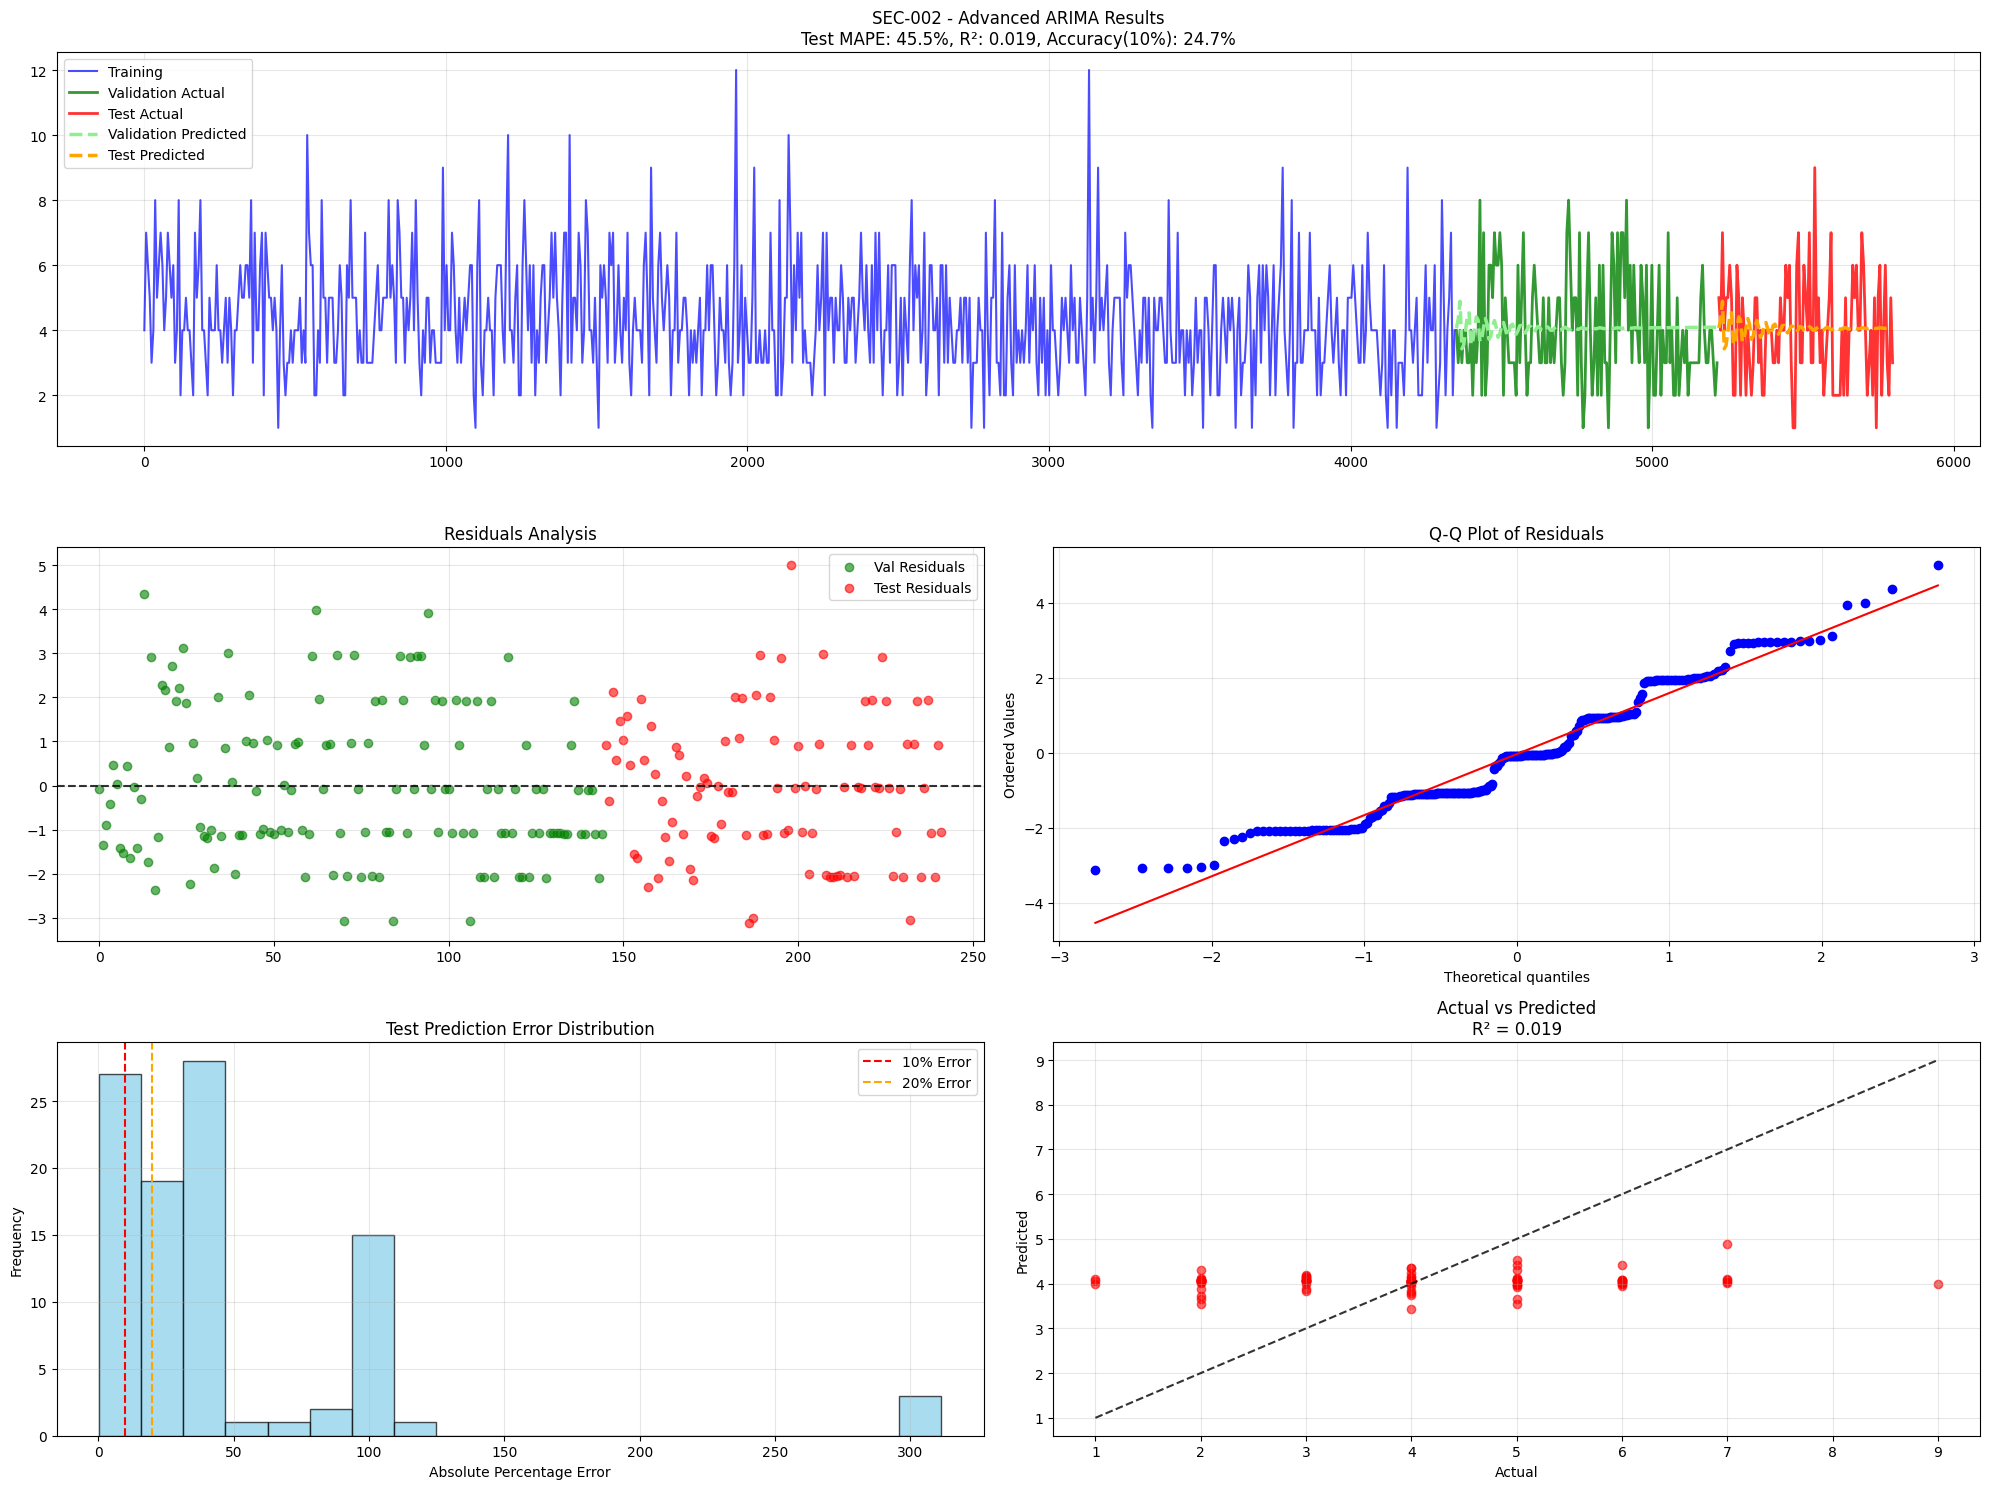


APPROACH 2: LOG TRANSFORMATION

ADVANCED ARIMA PIPELINE FOR SEC-002

Optimized data split for SEC-002:
Training: 725 samples (75.0%)
Validation: 145 samples (15.0%)
Test: 97 samples (10.0%)

ENHANCED PREPROCESSING FOR SEC-002
Applying advanced outlier treatment...
Applying log transformation...
Applied transformations: outlier_treatment, log_transform

ENHANCED STATIONARITY TESTING
Differencing order 0:
  ADF p-value: 0.000000 (✓)
  KPSS p-value: 0.100000 (✓)
  Variance stable: ✓
✅ Series is stationary with 0 differencing steps!

ADVANCED PARAMETER SELECTION
Testing parameters: p(0-6), d(0), q(0-6)
  Progress: 10/49 models tested...
  Progress: 20/49 models tested...
  Progress: 30/49 models tested...
  Progress: 40/49 models tested...

Top 5 models by each criterion:

AIC:
 p  d  q        AIC LjungBox_p
 5  0  6 392.976651  lb_pvalue
 5  0  5 393.852983  lb_pvalue
 6  0  5 394.479989  lb_pvalue
 6  0  6 394.588640  lb_pvalue
 4  0  4 395.146018  lb_pvalue

BIC:
 p  d  q        BIC Lj

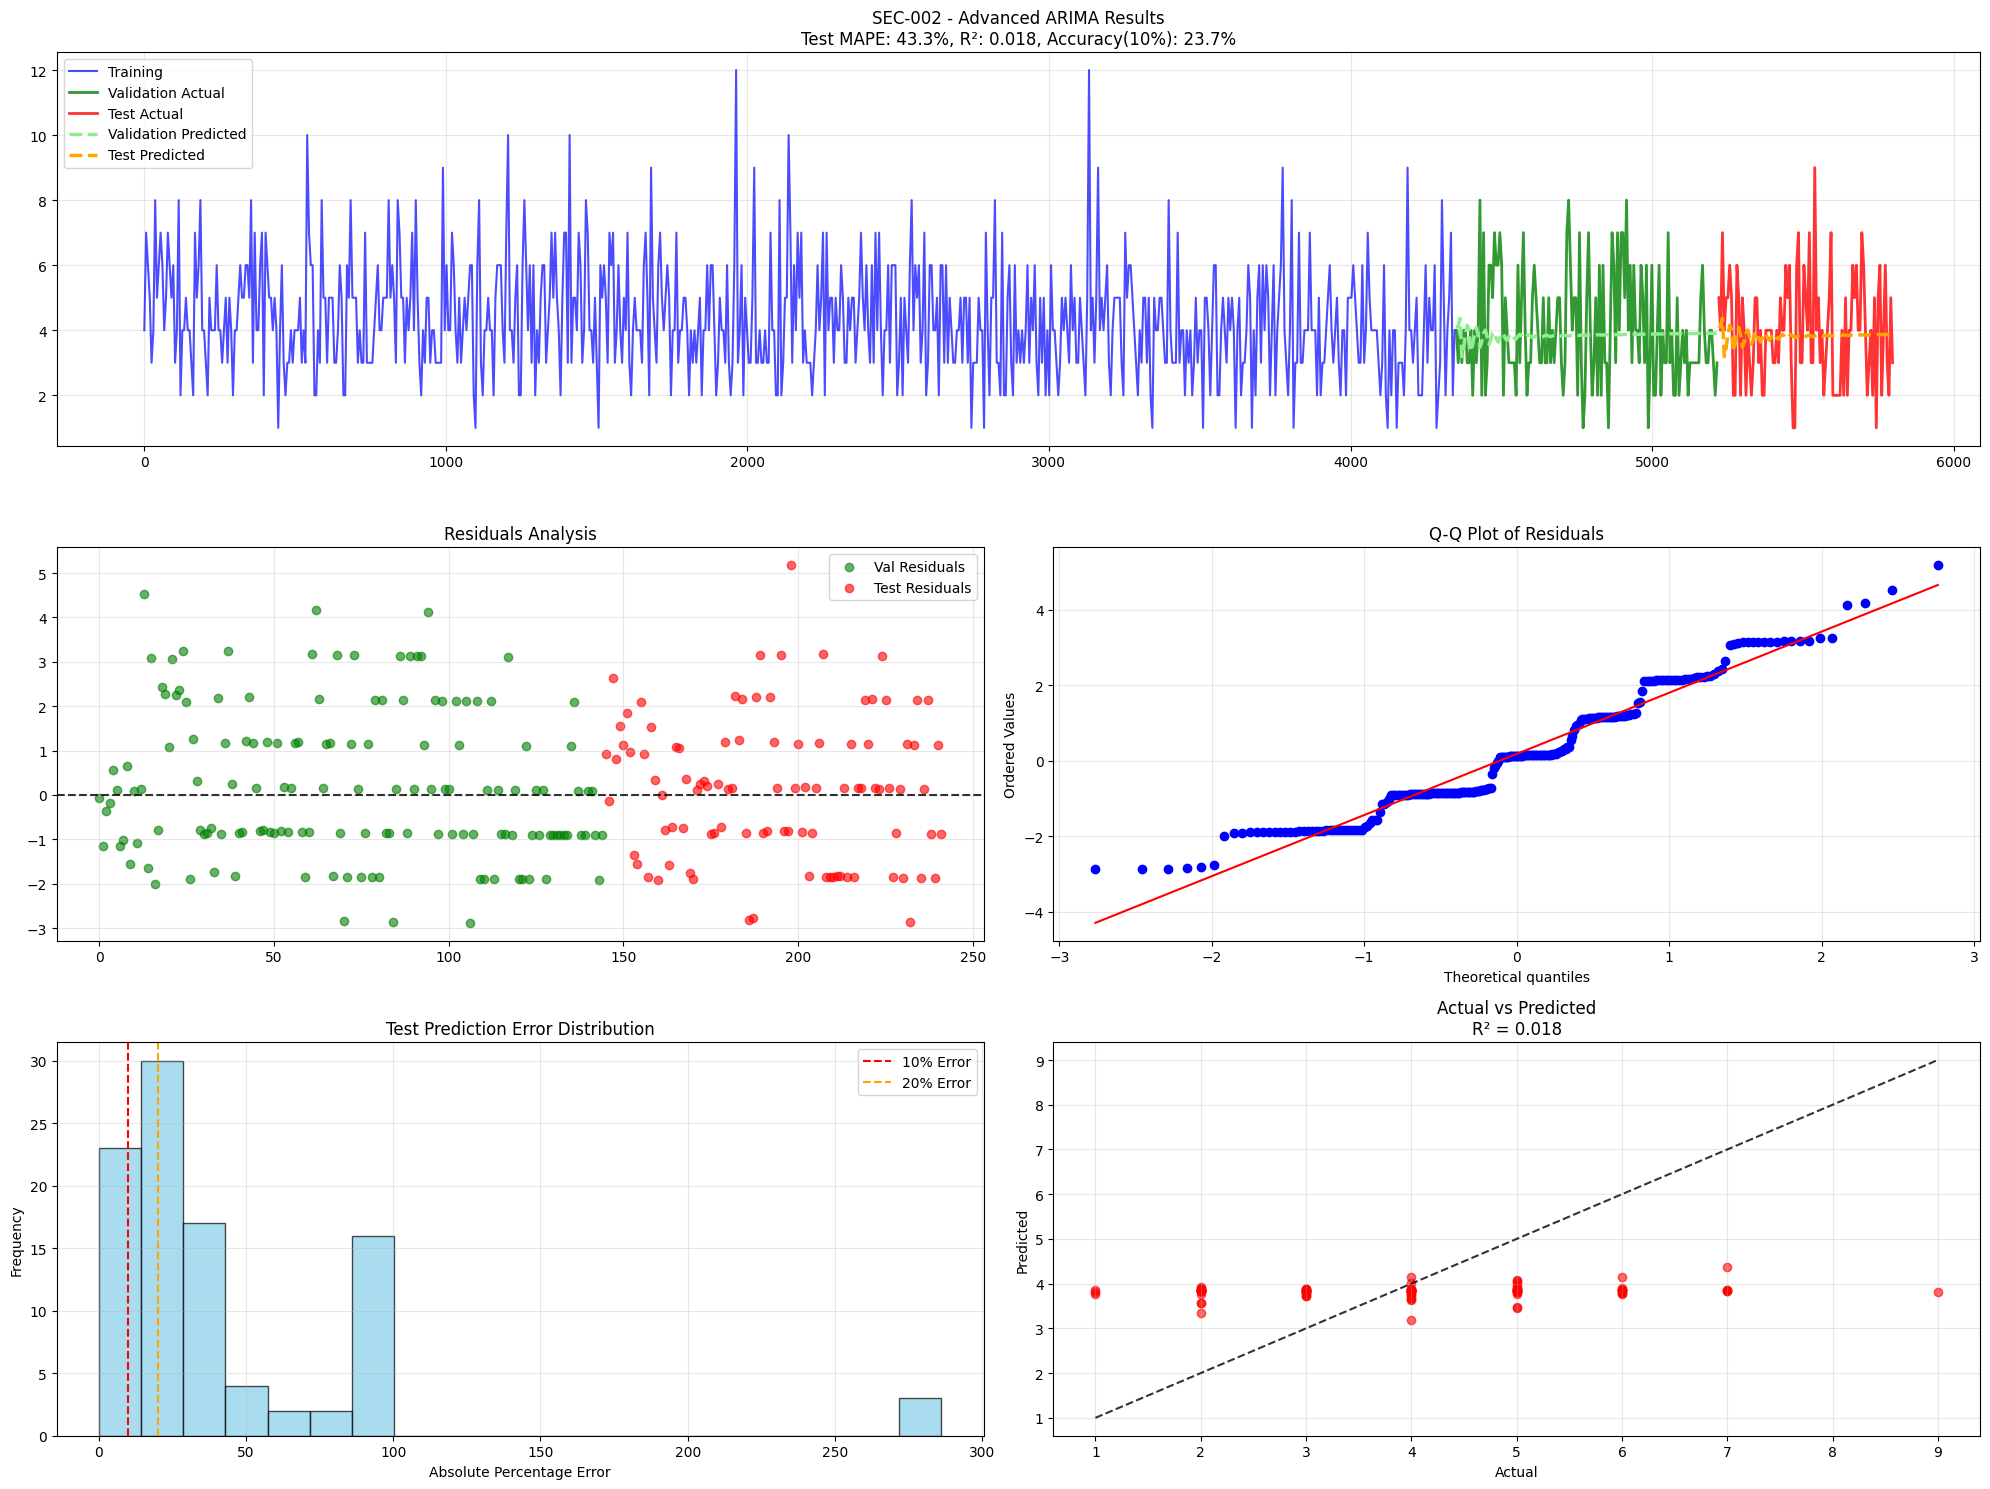


APPROACH 3: BOX-COX TRANSFORMATION

ADVANCED ARIMA PIPELINE FOR SEC-002

Optimized data split for SEC-002:
Training: 725 samples (75.0%)
Validation: 145 samples (15.0%)
Test: 97 samples (10.0%)

ENHANCED PREPROCESSING FOR SEC-002
Applying advanced outlier treatment...
Applying Box-Cox transformation...
Applied transformations: outlier_treatment, box_cox_transform

ENHANCED STATIONARITY TESTING
Differencing order 0:
  ADF p-value: 0.000000 (✓)
  KPSS p-value: 0.100000 (✓)
  Variance stable: ✓
✅ Series is stationary with 0 differencing steps!

ADVANCED PARAMETER SELECTION
Testing parameters: p(0-6), d(0), q(0-6)
  Progress: 10/49 models tested...
  Progress: 20/49 models tested...
  Progress: 30/49 models tested...
  Progress: 40/49 models tested...

Top 5 models by each criterion:

AIC:
 p  d  q         AIC LjungBox_p
 5  0  5 1648.010280  lb_pvalue
 5  0  6 1649.386968  lb_pvalue
 6  0  5 1650.694016  lb_pvalue
 6  0  6 1650.920206  lb_pvalue
 4  0  4 1652.663240  lb_pvalue

BIC:
 p  

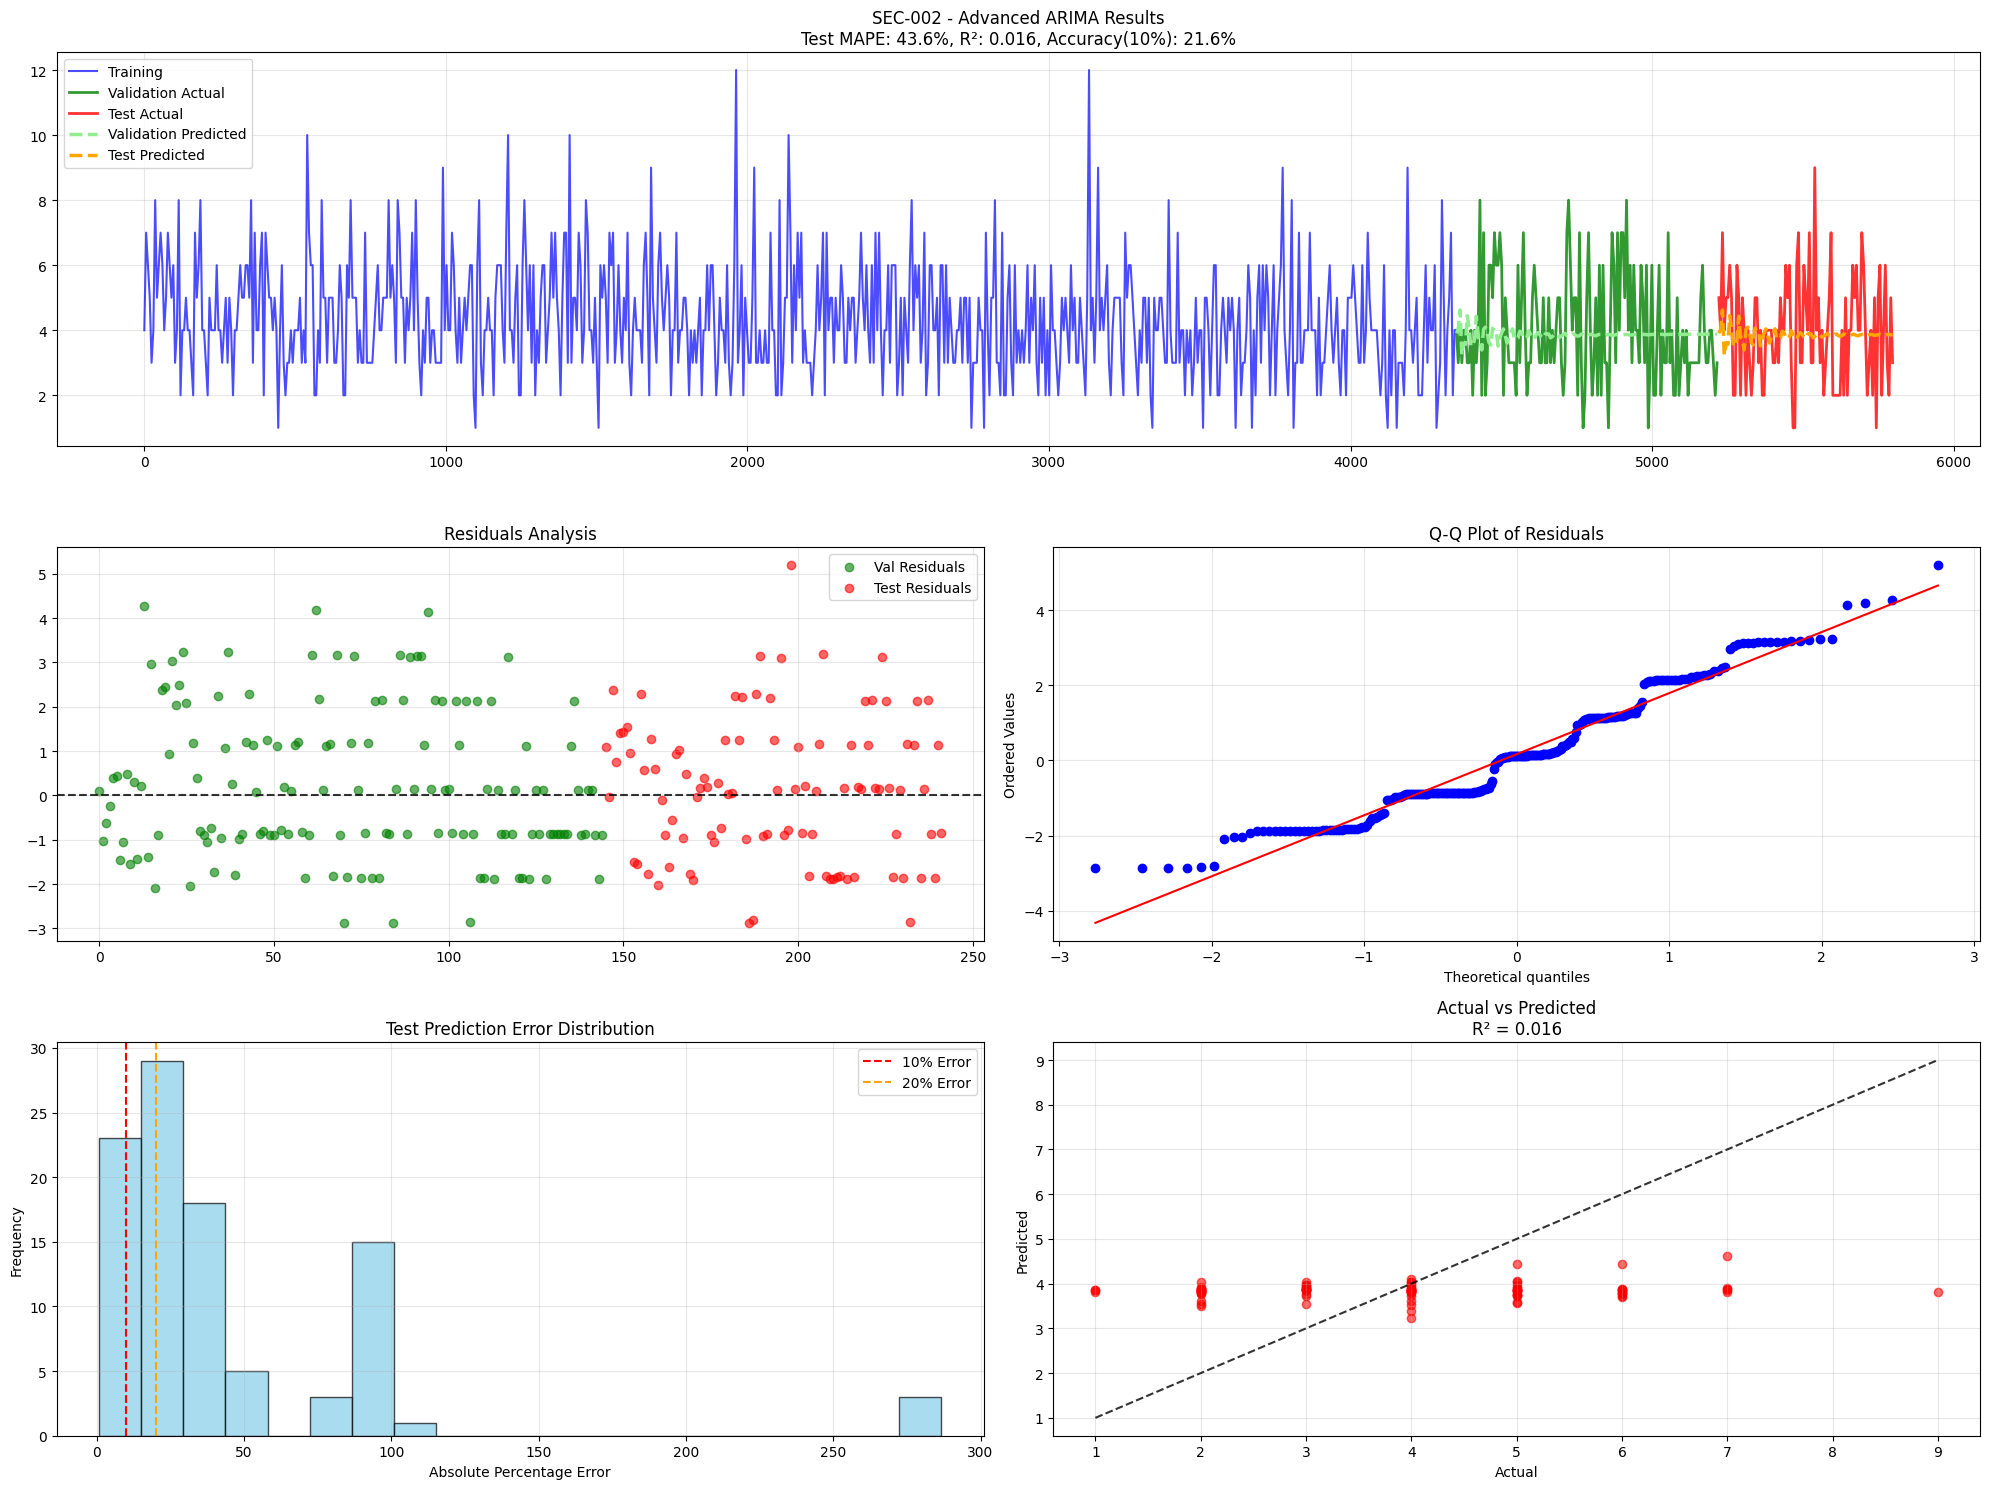


APPROACH 4: ENSEMBLE PREDICTION

ADVANCED ARIMA PIPELINE FOR SEC-002

Optimized data split for SEC-002:
Training: 725 samples (75.0%)
Validation: 145 samples (15.0%)
Test: 97 samples (10.0%)

ENHANCED PREPROCESSING FOR SEC-002
Applying advanced outlier treatment...
Applied transformations: outlier_treatment

ENHANCED STATIONARITY TESTING
Differencing order 0:
  ADF p-value: 0.000000 (✓)
  KPSS p-value: 0.100000 (✓)
  Variance stable: ✓
✅ Series is stationary with 0 differencing steps!

ADVANCED PARAMETER SELECTION
Testing parameters: p(0-6), d(0), q(0-6)
  Progress: 10/49 models tested...
  Progress: 20/49 models tested...
  Progress: 30/49 models tested...
  Progress: 40/49 models tested...

Top 5 models by each criterion:

AIC:
 p  d  q         AIC LjungBox_p
 5  0  6 2791.041143  lb_pvalue
 6  0  5 2792.495125  lb_pvalue
 6  0  6 2792.845668  lb_pvalue
 5  0  5 2794.833833  lb_pvalue
 5  0  4 2795.344377  lb_pvalue

BIC:
 p  d  q         BIC LjungBox_p
 2  0  2 2829.127383  lb_pval

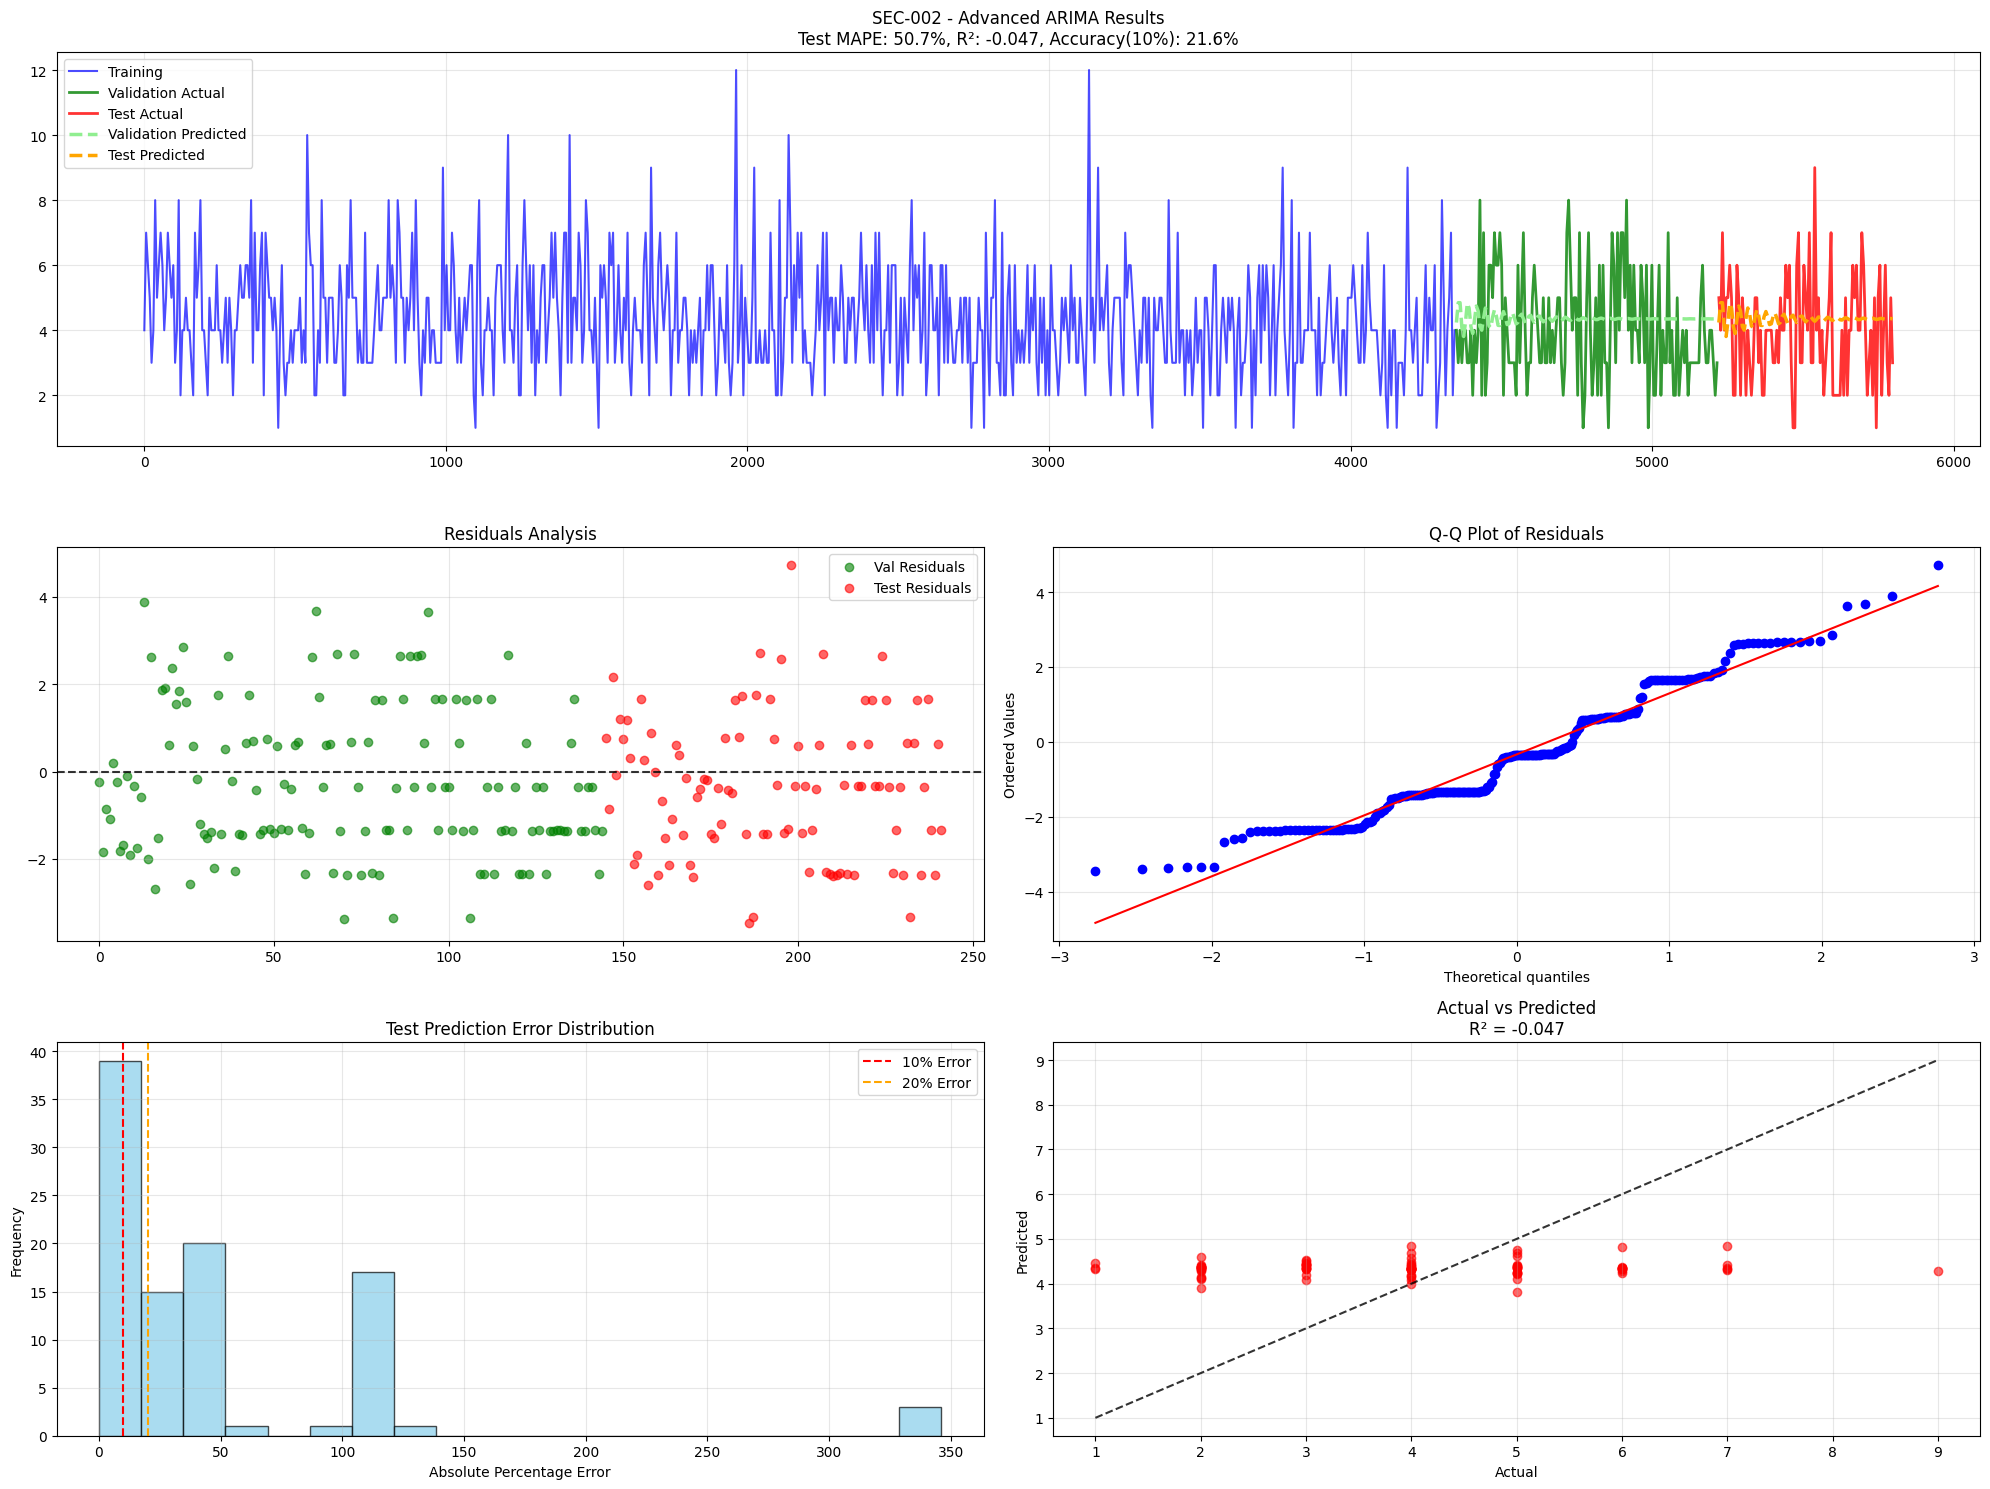


COMPARISON OF ALL APPROACHES FOR SEC-002

Performance Comparison:
     Approach  MAPE  MAE  RMSE    R²  Accuracy_10%  Accuracy_20%  Dir_Accuracy
         Auto 45.50 1.28  1.59  0.02         24.74         37.11         53.12
Log_Transform 43.26 1.29  1.59  0.02         23.71         26.80         54.17
      Box_Cox 43.57 1.30  1.60  0.02         21.65         28.87         57.29
     Ensemble 50.72 1.36  1.65 -0.05         21.65         42.27         53.12

Best performing approaches:
  Lowest MAPE: Log_Transform (43.26%)
  Highest R²: Auto (0.019)
  Best 10% Accuracy: Auto (24.7%)


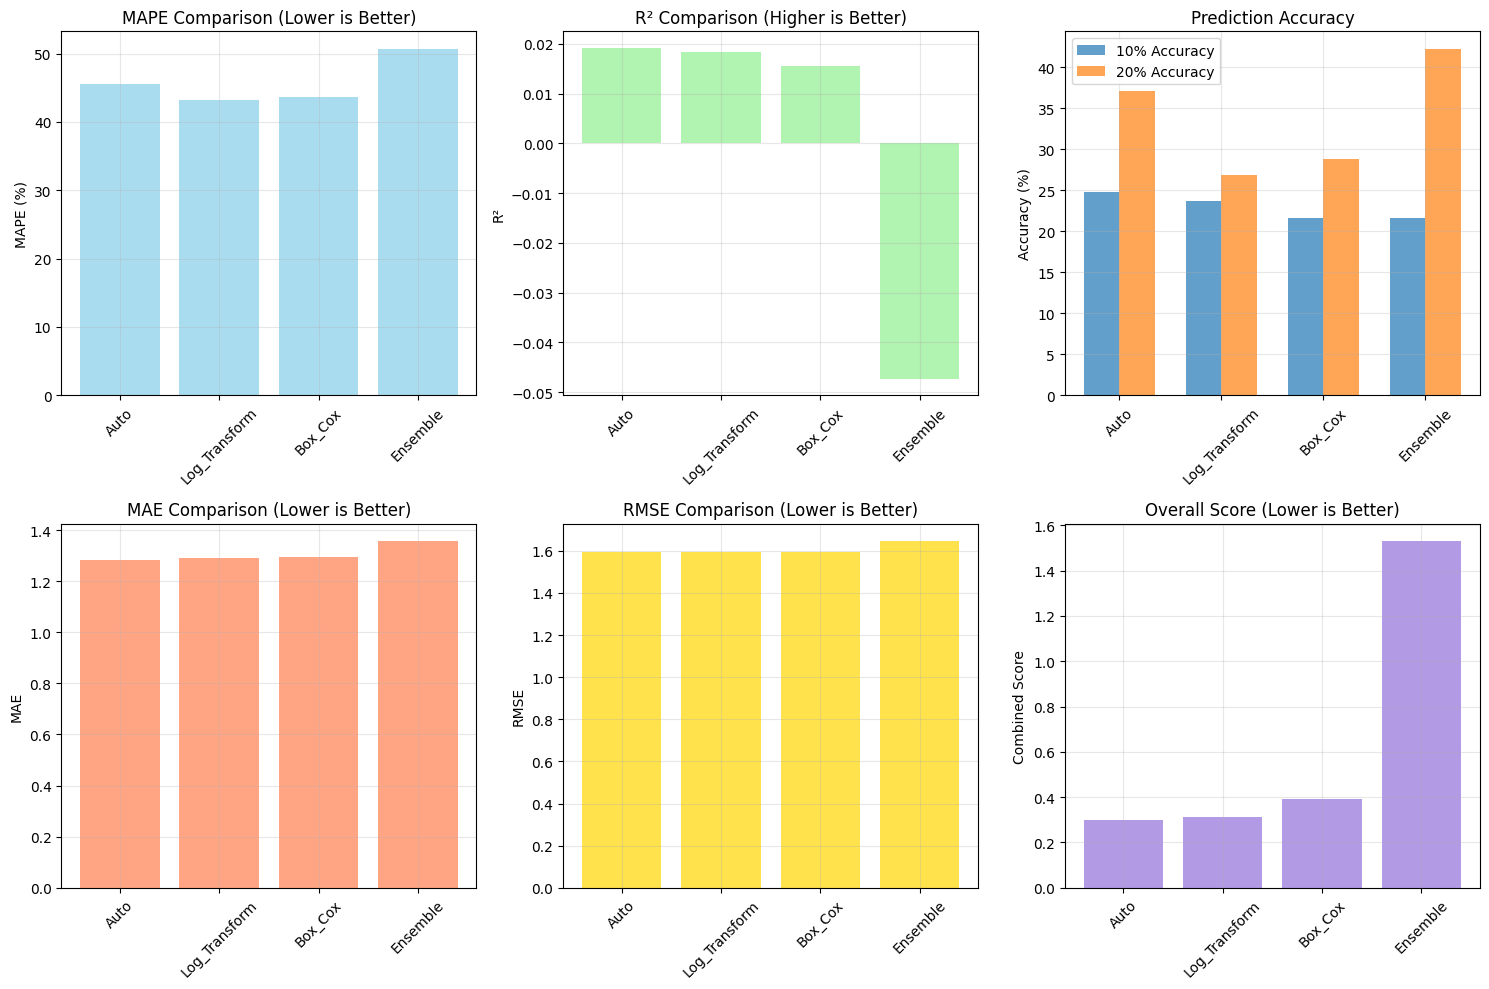


Running detailed analysis on best approach: Log_Transform

TIME SERIES PATTERN ANALYSIS FOR SEC-002


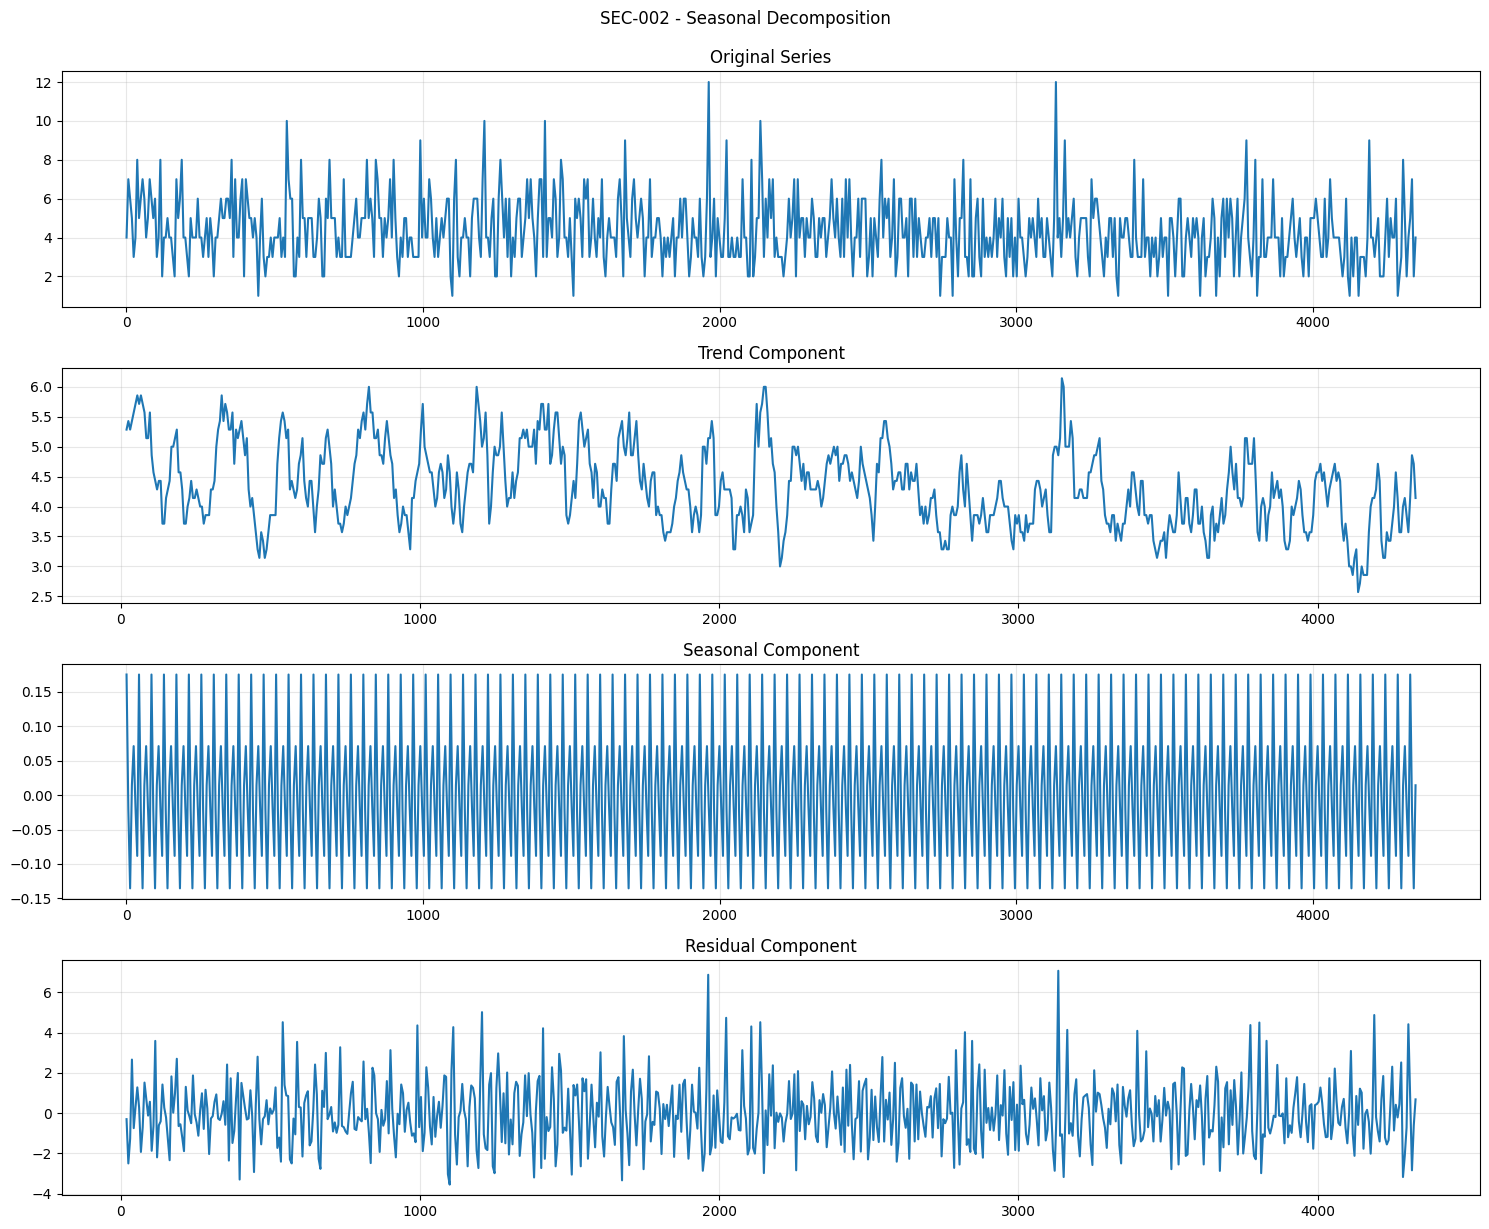

Seasonal Strength: 0.003
Trend Strength: 0.153
✅ Strong trend detected - differencing was appropriate


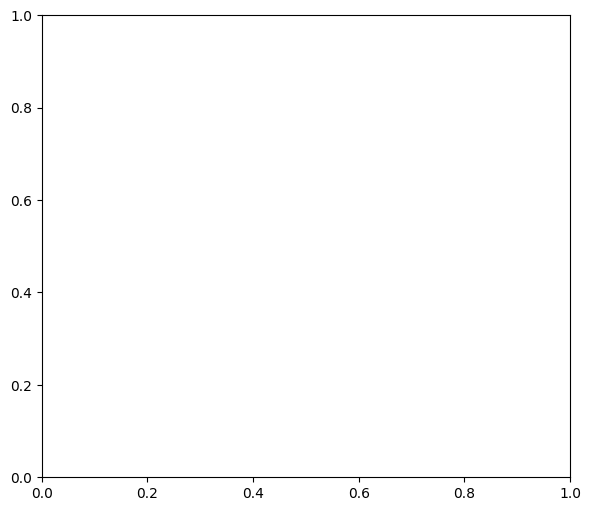

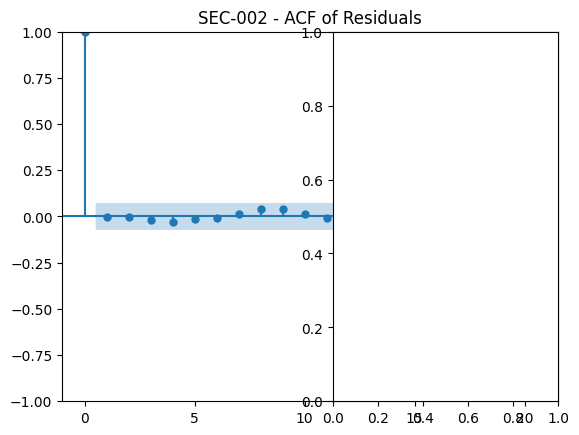

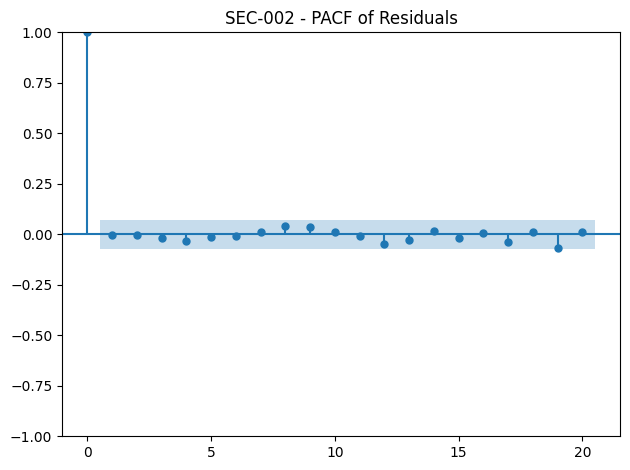

✅ No significant residual autocorrelation

RECOMMENDATIONS BASED ON SEC-002 ANALYSIS
✅ Best performing approach for SEC-002: Log_Transform
✅ Achieved MAPE: 43.26%
⚠️  Performance could be better. Consider additional tuning.

APPLYING BEST APPROACH TO ALL SECTIONS
Approach: LOG_TRANSFORM, Ensemble: False

--------------------------------------------------
Processing SEC-001...
--------------------------------------------------

ADVANCED ARIMA PIPELINE FOR SEC-001

Optimized data split for SEC-001:
Training: 725 samples (75.0%)
Validation: 145 samples (15.0%)
Test: 97 samples (10.0%)

ENHANCED PREPROCESSING FOR SEC-001
Applying advanced outlier treatment...
  Outliers detected: 5
Applied transformations: outlier_treatment

ENHANCED STATIONARITY TESTING
Differencing order 0:
  ADF p-value: 0.000000 (✓)
  KPSS p-value: 0.092673 (✓)
  Variance stable: ✓
✅ Series is stationary with 0 differencing steps!

ADVANCED PARAMETER SELECTION
Testing parameters: p(0-6), d(0), q(0-6)
  Progress: 10/49 

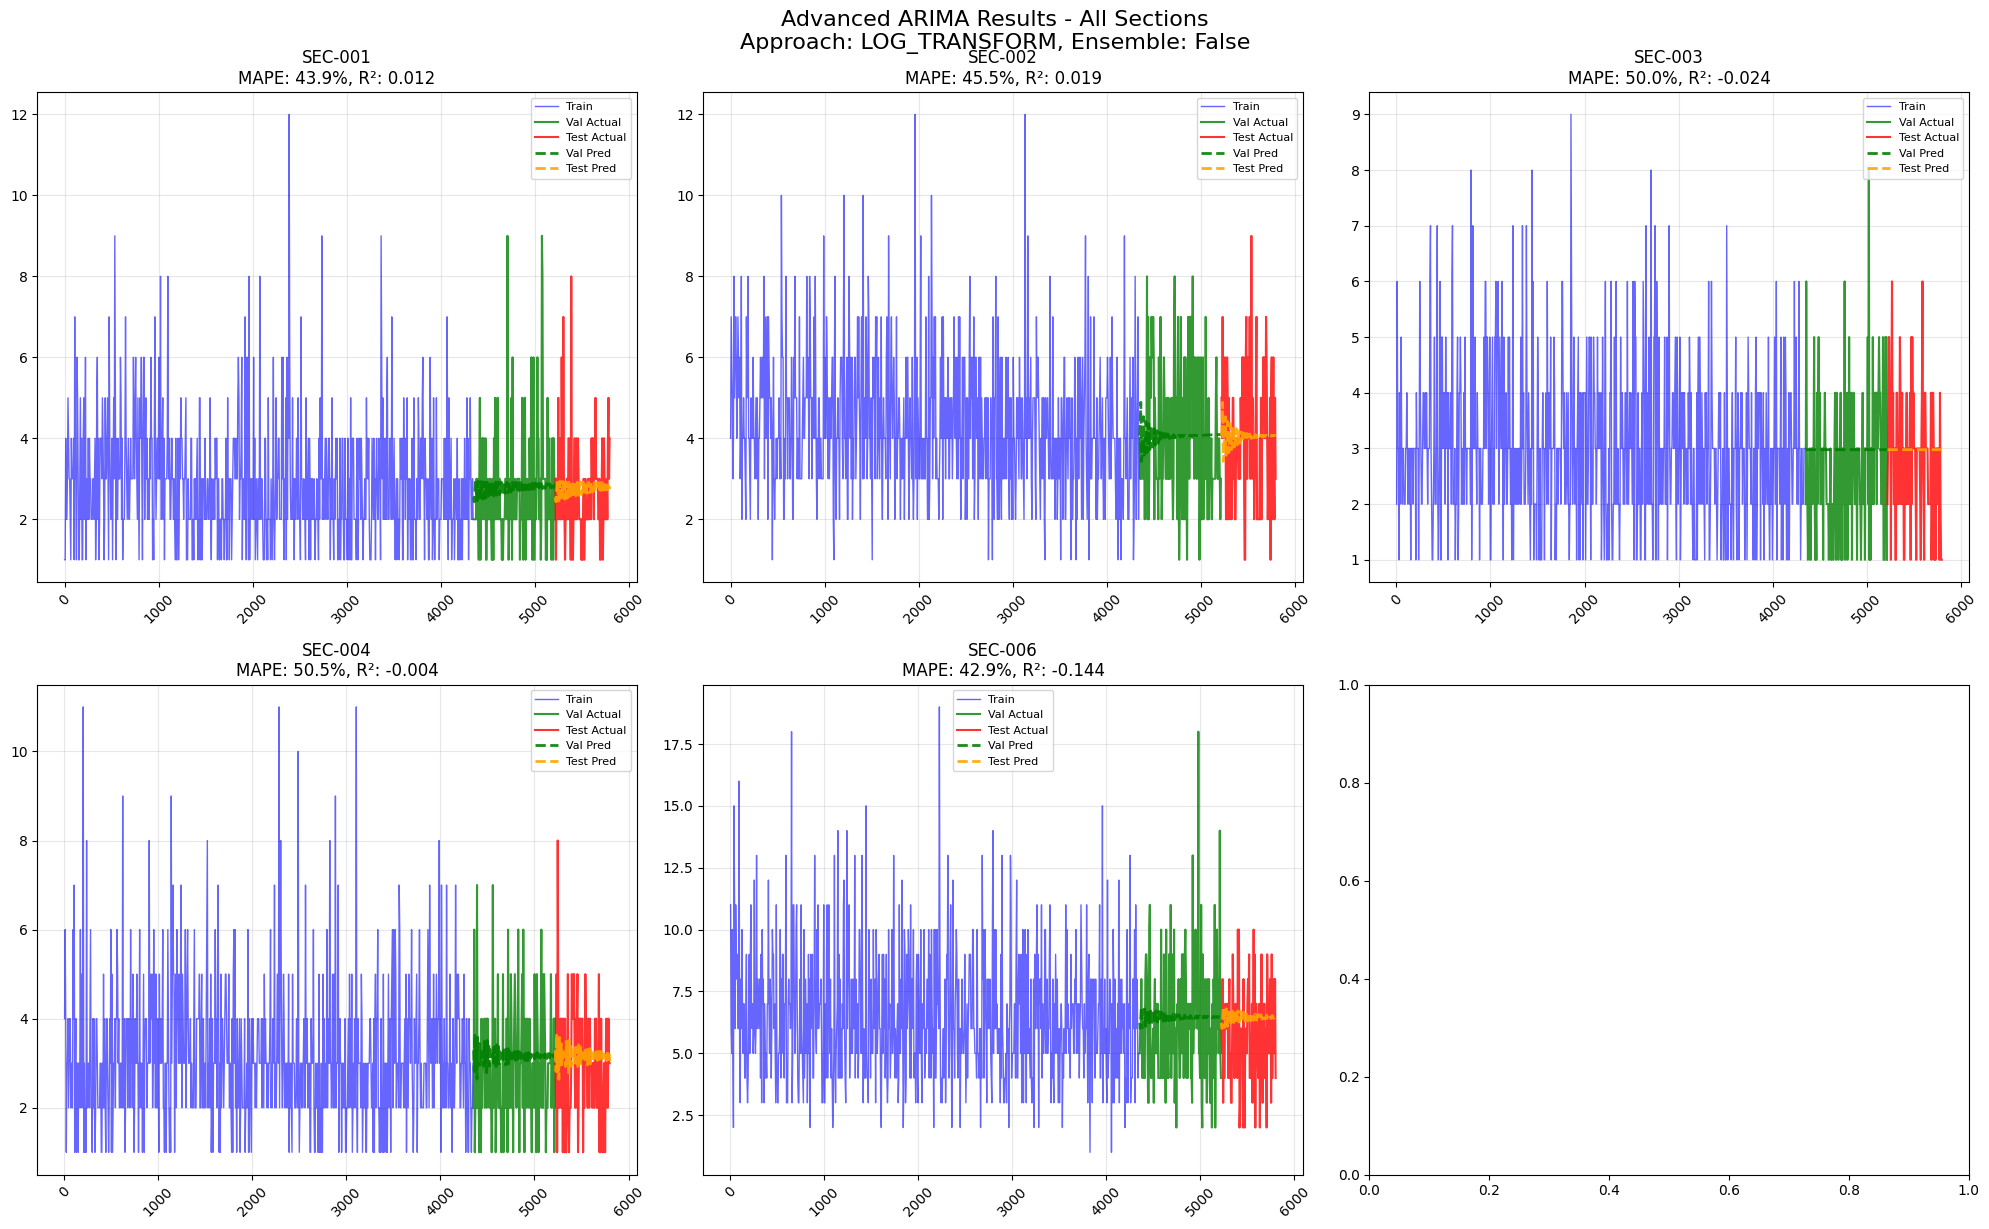


To apply this approach to all sections, run:
final_results, final_summary = apply_best_approach_to_all_sections(
    sections_data, 'log_transform', use_ensemble=False)

Do you want to proceed with applying the best approach to all sections? (Uncomment the lines below)
# final_results, final_summary = apply_best_approach_to_all_sections(sections_data, 'log_transform', False)


In [14]:
# Complete usage examples for advanced ARIMA enhancements

# Test single section first with different approaches
print("="*80)
print("TESTING ADVANCED ENHANCEMENTS ON SINGLE SECTION (SEC-002)")
print("="*80)

# Approach 1: Auto preprocessing (recommended first try)
print("\n" + "="*60)
print("APPROACH 1: AUTO PREPROCESSING")
print("="*60)

predictor_auto, results_auto = test_single_section_advanced(
    sec_2_data, 'employees_on_duty', 'SEC-002', 
    preprocessing='auto', use_ensemble=False
)

# Approach 2: Log transformation
print("\n" + "="*60)
print("APPROACH 2: LOG TRANSFORMATION")
print("="*60)

predictor_log, results_log = test_single_section_advanced(
    sec_2_data, 'employees_on_duty', 'SEC-002', 
    preprocessing='log', use_ensemble=False
)

# Approach 3: Box-Cox transformation
print("\n" + "="*60)
print("APPROACH 3: BOX-COX TRANSFORMATION")
print("="*60)

predictor_boxcox, results_boxcox = test_single_section_advanced(
    sec_2_data, 'employees_on_duty', 'SEC-002', 
    preprocessing='box_cox', use_ensemble=False
)

# Approach 4: Ensemble with auto preprocessing
print("\n" + "="*60)
print("APPROACH 4: ENSEMBLE PREDICTION")
print("="*60)

predictor_ensemble, results_ensemble = test_single_section_advanced(
    sec_2_data, 'employees_on_duty', 'SEC-002', 
    preprocessing='auto', use_ensemble=True
)

# Compare all approaches for Section 2
def compare_approaches_single_section(results_dict, section_name):
    """Compare different approaches for a single section"""
    print(f"\n{'='*80}")
    print(f"COMPARISON OF ALL APPROACHES FOR {section_name}")
    print(f"{'='*80}")
    
    comparison_data = []
    for approach_name, results in results_dict.items():
        test_metrics = results['test_metrics']
        comparison_data.append({
            'Approach': approach_name,
            'MAPE': test_metrics['MAPE'],
            'MAE': test_metrics['MAE'],
            'RMSE': test_metrics['RMSE'],
            'R²': test_metrics['R2'],
            'Accuracy_10%': test_metrics['Accuracy_10pct'],
            'Accuracy_20%': test_metrics['Accuracy_20pct'],
            'Dir_Accuracy': test_metrics['Directional_Accuracy']
        })
    
    comparison_df = pd.DataFrame(comparison_data)
    print("\nPerformance Comparison:")
    print(comparison_df.round(2).to_string(index=False))
    
    # Find best approach for each metric
    print(f"\nBest performing approaches:")
    print(f"  Lowest MAPE: {comparison_df.loc[comparison_df['MAPE'].idxmin(), 'Approach']} ({comparison_df['MAPE'].min():.2f}%)")
    print(f"  Highest R²: {comparison_df.loc[comparison_df['R²'].idxmax(), 'Approach']} ({comparison_df['R²'].max():.3f})")
    print(f"  Best 10% Accuracy: {comparison_df.loc[comparison_df['Accuracy_10%'].idxmax(), 'Approach']} ({comparison_df['Accuracy_10%'].max():.1f}%)")
    
    # Visualization
    plt.figure(figsize=(15, 10))
    
    # Plot 1: MAPE comparison
    plt.subplot(2, 3, 1)
    plt.bar(comparison_df['Approach'], comparison_df['MAPE'], alpha=0.7, color='skyblue')
    plt.title('MAPE Comparison (Lower is Better)')
    plt.ylabel('MAPE (%)')
    plt.xticks(rotation=45)
    plt.grid(True, alpha=0.3)
    
    # Plot 2: R² comparison
    plt.subplot(2, 3, 2)
    plt.bar(comparison_df['Approach'], comparison_df['R²'], alpha=0.7, color='lightgreen')
    plt.title('R² Comparison (Higher is Better)')
    plt.ylabel('R²')
    plt.xticks(rotation=45)
    plt.grid(True, alpha=0.3)
    
    # Plot 3: Accuracy comparison
    plt.subplot(2, 3, 3)
    x = np.arange(len(comparison_df))
    width = 0.35
    plt.bar(x - width/2, comparison_df['Accuracy_10%'], width, label='10% Accuracy', alpha=0.7)
    plt.bar(x + width/2, comparison_df['Accuracy_20%'], width, label='20% Accuracy', alpha=0.7)
    plt.title('Prediction Accuracy')
    plt.ylabel('Accuracy (%)')
    plt.xticks(x, comparison_df['Approach'], rotation=45)
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # Plot 4: MAE comparison
    plt.subplot(2, 3, 4)
    plt.bar(comparison_df['Approach'], comparison_df['MAE'], alpha=0.7, color='coral')
    plt.title('MAE Comparison (Lower is Better)')
    plt.ylabel('MAE')
    plt.xticks(rotation=45)
    plt.grid(True, alpha=0.3)
    
    # Plot 5: RMSE comparison
    plt.subplot(2, 3, 5)
    plt.bar(comparison_df['Approach'], comparison_df['RMSE'], alpha=0.7, color='gold')
    plt.title('RMSE Comparison (Lower is Better)')
    plt.ylabel('RMSE')
    plt.xticks(rotation=45)
    plt.grid(True, alpha=0.3)
    
    # Plot 6: Overall score (combination of metrics)
    plt.subplot(2, 3, 6)
    # Normalize metrics and create overall score (lower is better)
    normalized_mape = comparison_df['MAPE'] / comparison_df['MAPE'].max()
    normalized_r2 = 1 - (comparison_df['R²'] / comparison_df['R²'].max())  # Invert R² since higher is better
    normalized_acc = 1 - (comparison_df['Accuracy_10%'] / comparison_df['Accuracy_10%'].max())
    
    overall_score = (normalized_mape + normalized_r2 + normalized_acc) / 3
    plt.bar(comparison_df['Approach'], overall_score, alpha=0.7, color='mediumpurple')
    plt.title('Overall Score (Lower is Better)')
    plt.ylabel('Combined Score')
    plt.xticks(rotation=45)
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    return comparison_df

# Run comparison
results_sec2_dict = {
    'Auto': results_auto,
    'Log_Transform': results_log,
    'Box_Cox': results_boxcox,
    'Ensemble': results_ensemble
}

comparison_sec2 = compare_approaches_single_section(results_sec2_dict, 'SEC-002')

# Additional analysis: Time series specific insights
def analyze_time_series_patterns(predictor, section_name):
    """Analyze time series patterns and model diagnostics"""
    print(f"\n{'='*60}")
    print(f"TIME SERIES PATTERN ANALYSIS FOR {section_name}")
    print(f"{'='*60}")
    
    # 1. Seasonal patterns
    if len(predictor.original_series) > 14:
        try:
            decomposition = seasonal_decompose(predictor.original_series, 
                                             model='additive', period=7)
            
            plt.figure(figsize=(15, 12))
            
            plt.subplot(4, 1, 1)
            decomposition.observed.plot(title='Original Series')
            plt.grid(True, alpha=0.3)
            
            plt.subplot(4, 1, 2)
            decomposition.trend.plot(title='Trend Component')
            plt.grid(True, alpha=0.3)
            
            plt.subplot(4, 1, 3)
            decomposition.seasonal.plot(title='Seasonal Component')
            plt.grid(True, alpha=0.3)
            
            plt.subplot(4, 1, 4)
            decomposition.resid.plot(title='Residual Component')
            plt.grid(True, alpha=0.3)
            
            plt.tight_layout()
            plt.suptitle(f'{section_name} - Seasonal Decomposition', y=1.02)
            plt.show()
            
            # Seasonal strength analysis
            seasonal_strength = np.var(decomposition.seasonal.dropna()) / np.var(decomposition.observed.dropna())
            trend_strength = np.var(decomposition.trend.dropna()) / np.var(decomposition.observed.dropna())
            
            print(f"Seasonal Strength: {seasonal_strength:.3f}")
            print(f"Trend Strength: {trend_strength:.3f}")
            
            if seasonal_strength > 0.1:
                print("✅ Strong seasonal pattern detected - consider SARIMA")
            if trend_strength > 0.1:
                print("✅ Strong trend detected - differencing was appropriate")
                
        except Exception as e:
            print(f"Seasonal decomposition failed: {e}")
    
    # 2. ACF/PACF analysis of residuals
    if hasattr(predictor, 'model') and predictor.model is not None:
        residuals = predictor.model.resid
        
        plt.figure(figsize=(15, 6))
        
        plt.subplot(1, 2, 1)
        plot_acf(residuals.dropna(), lags=20)
        plt.title(f'{section_name} - ACF of Residuals')
        
        plt.subplot(1, 2, 2)
        plot_pacf(residuals.dropna(), lags=20)
        plt.title(f'{section_name} - PACF of Residuals')
        
        plt.tight_layout()
        plt.show()
        
        # Ljung-Box test
        try:
            lb_test = acorr_ljungbox(residuals, lags=10, return_df=True)
            lb_significant = (lb_test['lb_pvalue'] < 0.05).any()
            
            if lb_significant:
                print("⚠️  Residual autocorrelation detected - model may need improvement")
            else:
                print("✅ No significant residual autocorrelation")
                
        except:
            print("Ljung-Box test failed")

# Run detailed analysis on best performing approach
best_approach = comparison_sec2.loc[comparison_sec2['MAPE'].idxmin(), 'Approach']
print(f"\nRunning detailed analysis on best approach: {best_approach}")

if best_approach == 'Auto':
    analyze_time_series_patterns(predictor_auto, 'SEC-002')
elif best_approach == 'Log_Transform':
    analyze_time_series_patterns(predictor_log, 'SEC-002')
elif best_approach == 'Box_Cox':
    analyze_time_series_patterns(predictor_boxcox, 'SEC-002')
elif best_approach == 'Ensemble':
    analyze_time_series_patterns(predictor_ensemble, 'SEC-002')

# Create sections_data dictionary from individual section dataframes
sections_data = {
    'SEC-001': sec_1_data,
    'SEC-002': sec_2_data,
    'SEC-003': sec_3_data,
    'SEC-004': sec_4_data,
    'SEC-005': sec_5_data,
    'SEC-006': sec_6_data
}

# Function to apply best approach to all sections
def apply_best_approach_to_all_sections(sections_data, best_approach='auto', use_ensemble=False):
    """Apply the best performing approach to all sections"""
    print(f"\n{'='*80}")
    print(f"APPLYING BEST APPROACH TO ALL SECTIONS")
    print(f"Approach: {best_approach.upper()}, Ensemble: {use_ensemble}")
    print(f"{'='*80}")
    
    all_results = {}
    section_summaries = []
    
    for section_name, data in sections_data.items():
        print(f"\n{'-'*50}")
        print(f"Processing {section_name}...")
        print(f"{'-'*50}")
        
        try:
            predictor = AdvancedARIMAPredictor(data, 'employees_on_duty', section_name)
            results = predictor.complete_advanced_pipeline(best_approach, use_ensemble)
            
            all_results[section_name] = {
                'predictor': predictor,
                'results': results
            }
            
            test_metrics = results['test_metrics']
            section_summaries.append({
                'Section': section_name,
                'MAPE': test_metrics['MAPE'],
                'MAE': test_metrics['MAE'],
                'RMSE': test_metrics['RMSE'],
                'R²': test_metrics['R2'],
                'Accuracy_10%': test_metrics['Accuracy_10pct'],
                'Accuracy_20%': test_metrics['Accuracy_20pct'],
                'Params': str(results['params'])
            })
            
        except Exception as e:
            print(f"❌ Failed to process {section_name}: {e}")
            continue
    
    # Summary results
    summary_df = pd.DataFrame(section_summaries)
    print(f"\n{'='*80}")
    print("FINAL RESULTS SUMMARY - ALL SECTIONS")
    print(f"{'='*80}")
    print(summary_df.round(2).to_string(index=False))
    
    print(f"\nOverall Performance:")
    print(f"Average MAPE: {summary_df['MAPE'].mean():.2f}% (±{summary_df['MAPE'].std():.2f})")
    print(f"Average R²: {summary_df['R²'].mean():.3f} (±{summary_df['R²'].std():.3f})")
    print(f"Average 10% Accuracy: {summary_df['Accuracy_10%'].mean():.1f}% (±{summary_df['Accuracy_10%'].std():.1f})")
    
    # Plot results for all sections
    fig, axes = plt.subplots(2, 3, figsize=(20, 12))
    axes = axes.flatten()
    
    for i, (section_name, section_data) in enumerate(all_results.items()):
        if i >= 6:
            break
            
        ax = axes[i]
        predictor = section_data['predictor']
        results = section_data['results']
        
        # Plot predictions
        ax.plot(predictor.train_data.index, predictor.train_data[predictor.target_column], 
               'b-', alpha=0.6, label='Train', linewidth=1)
        ax.plot(predictor.val_data.index, predictor.val_data[predictor.target_column], 
               'g-', alpha=0.8, label='Val Actual', linewidth=1.5)
        ax.plot(predictor.test_data.index, predictor.test_data[predictor.target_column], 
               'r-', alpha=0.8, label='Test Actual', linewidth=1.5)
        ax.plot(predictor.val_data.index, results['val_pred'], 
               'g--', alpha=0.9, label='Val Pred', linewidth=2)
        ax.plot(predictor.test_data.index, results['test_pred'], 
               'orange', linestyle='--', alpha=0.9, label='Test Pred', linewidth=2)
        
        ax.set_title(f"{section_name}\nMAPE: {results['test_metrics']['MAPE']:.1f}%, "
                    f"R²: {results['test_metrics']['R2']:.3f}")
        ax.legend(fontsize=8)
        ax.grid(True, alpha=0.3)
        
        # Rotate x-axis labels
        for tick in ax.get_xticklabels():
            tick.set_rotation(45)
    
    plt.tight_layout()
    plt.suptitle(f'Advanced ARIMA Results - All Sections\nApproach: {best_approach.upper()}, Ensemble: {use_ensemble}', 
                 fontsize=16, y=1.02)
    plt.show()
    
    return all_results, summary_df

# Recommendation based on SEC-002 results
print(f"\n{'='*80}")
print("RECOMMENDATIONS BASED ON SEC-002 ANALYSIS")
print(f"{'='*80}")

best_mape = comparison_sec2['MAPE'].min()
best_approach_name = comparison_sec2.loc[comparison_sec2['MAPE'].idxmin(), 'Approach']

print(f"✅ Best performing approach for SEC-002: {best_approach_name}")
print(f"✅ Achieved MAPE: {best_mape:.2f}%")

if best_mape < 15:
    print("🎉 Excellent performance! Ready to apply to all sections.")
elif best_mape < 25:
    print("👍 Good performance! Should work well for other sections.")
else:
    print("⚠️  Performance could be better. Consider additional tuning.")

# Now you can run the function with this dictionary
final_results, final_summary = apply_best_approach_to_all_sections(
    sections_data, 
    best_approach_name.lower(), 
    use_ensemble=('Ensemble' in best_approach_name)
)


print(f"\nTo apply this approach to all sections, run:")
print(f"final_results, final_summary = apply_best_approach_to_all_sections(")
print(f"    sections_data, '{best_approach_name.lower()}', use_ensemble={'True' if 'Ensemble' in best_approach_name else 'False'})")

# If you want to proceed automatically with the best approach:
print(f"\nDo you want to proceed with applying the best approach to all sections? (Uncomment the lines below)")
print(f"# final_results, final_summary = apply_best_approach_to_all_sections(sections_data, '{best_approach_name.lower()}', {'True' if 'Ensemble' in best_approach_name else 'False'})")